# K-Means Clustering

## Import Library

In [1]:
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from dtw import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Path Dataset

In [2]:
DATASET_PERSON1 = r"D:\KULIAH\SEMESTER 5\Program Saint Data\Uranus\myfirstbook\Audio_recognition\Dataset_Voice_pertama"
DATASET_PERSON2 = r"D:\KULIAH\SEMESTER 5\Program Saint Data\Uranus\myfirstbook\Audio_recognition\Dataset_Voice_kedua"

SUBFOLDERS = ["Buka_wav", "Tutup_wav"]    
SUBFOLDERS_2 = ["Buka", "Tutup"]          

## Menampilkan Visual Amplitudo Data Mentah

In [3]:
def load_audio_from_folder(folder_path, sr=16000):
    audio_list = []

    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            filepath = os.path.join(folder_path, file)
            y, _ = librosa.load(filepath, sr=sr)
            audio_list.append((file, y))

    return audio_list


person1_audio = {}
for sub in SUBFOLDERS:
    folder = os.path.join(DATASET_PERSON1, sub)
    person1_audio[sub] = load_audio_from_folder(folder)


person2_audio = {}
for sub in SUBFOLDERS_2:
    folder = os.path.join(DATASET_PERSON2, sub)
    person2_audio[sub] = load_audio_from_folder(folder)


def plot_waveforms(audio_dict, title):
    for category, items in audio_dict.items():
        for filename, y in items:
            plt.figure(figsize=(10, 3))
            plt.plot(y)
            plt.title(f"{title} - {category} - {filename}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()

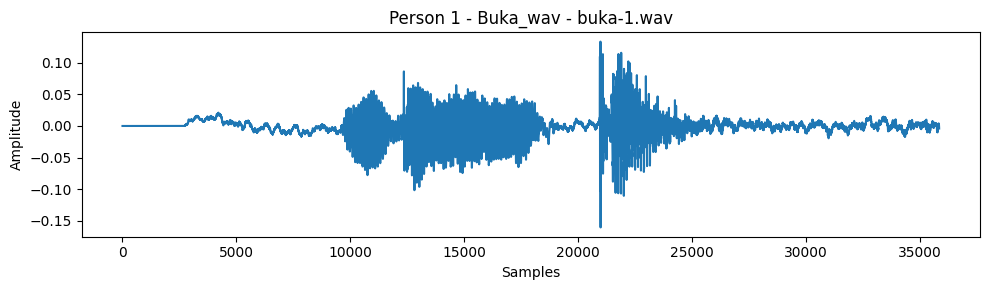

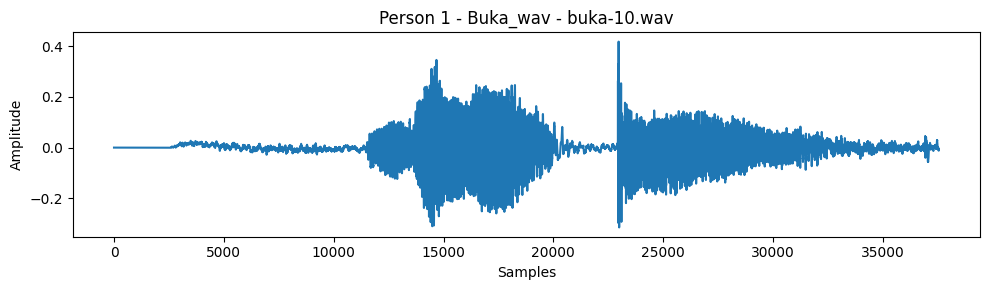

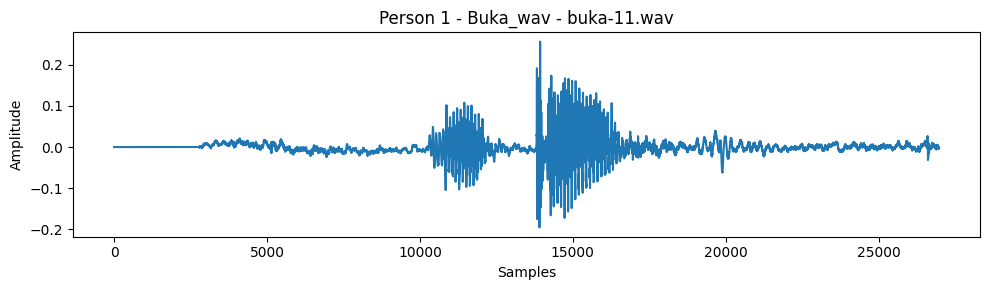

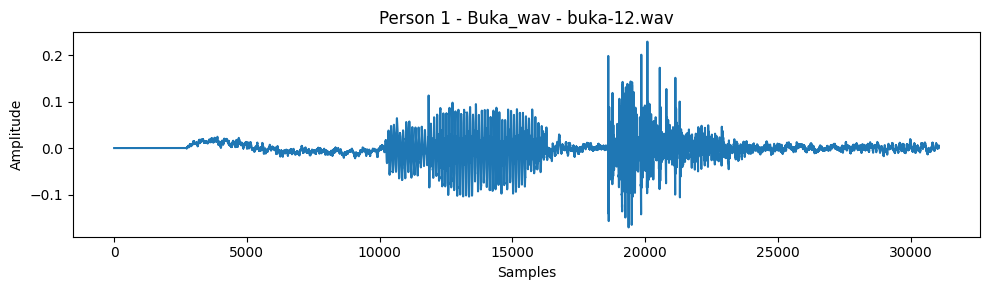

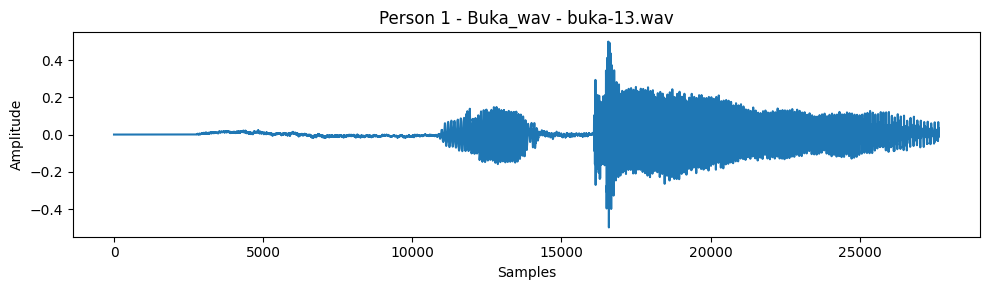

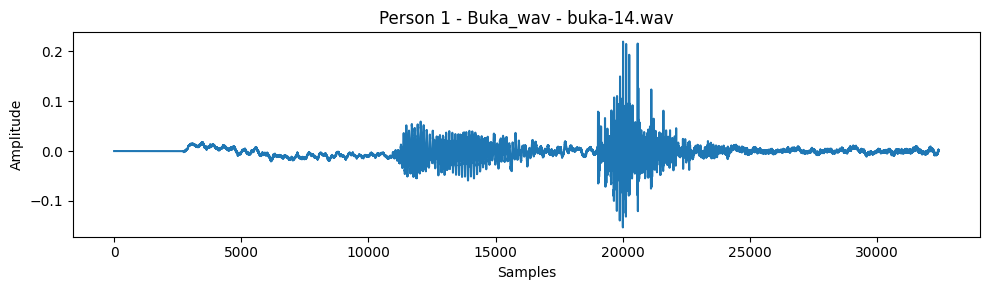

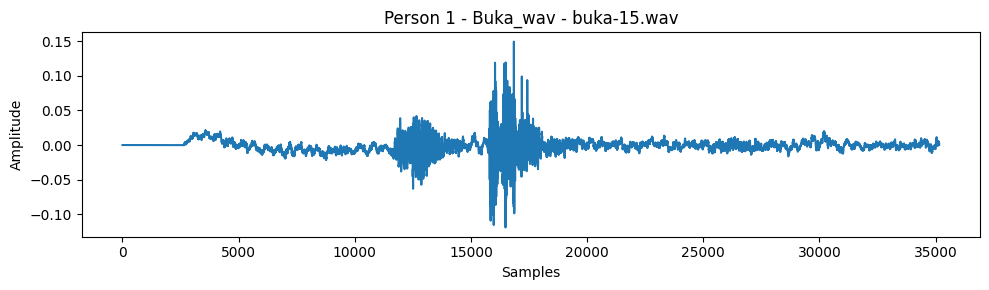

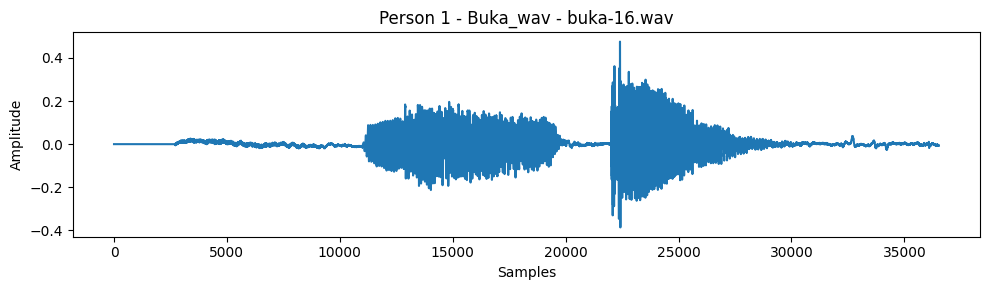

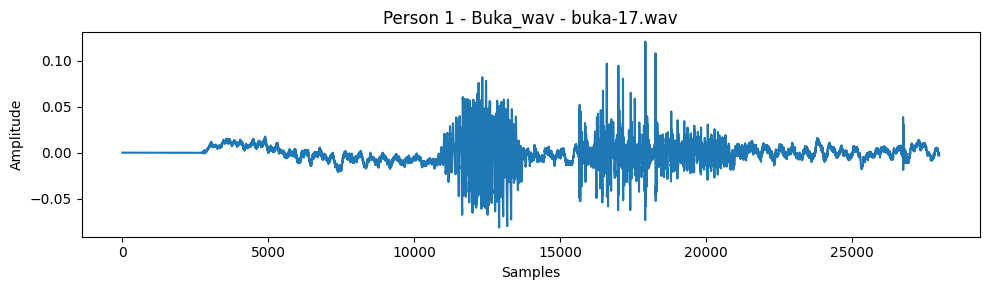

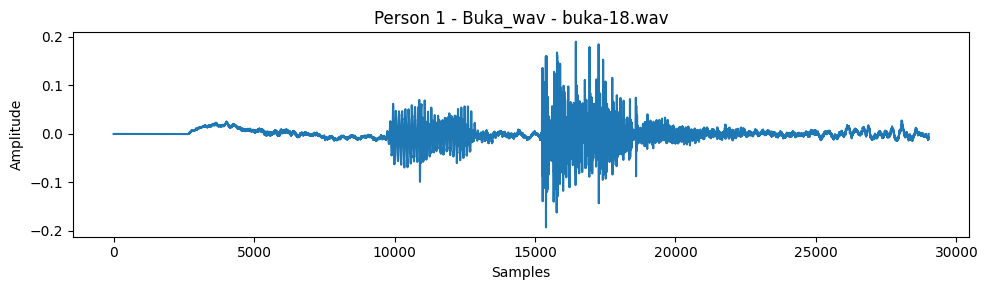

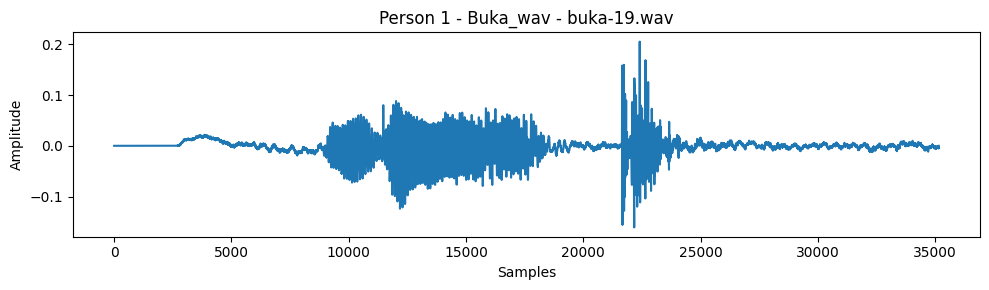

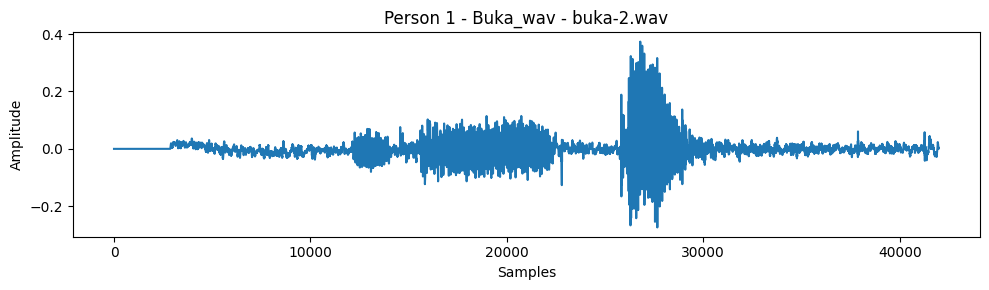

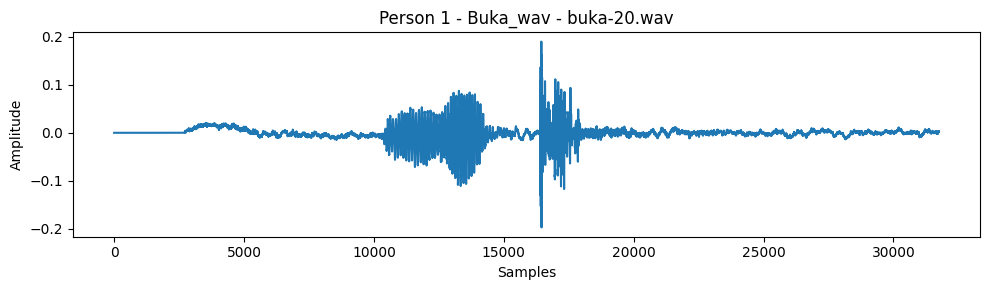

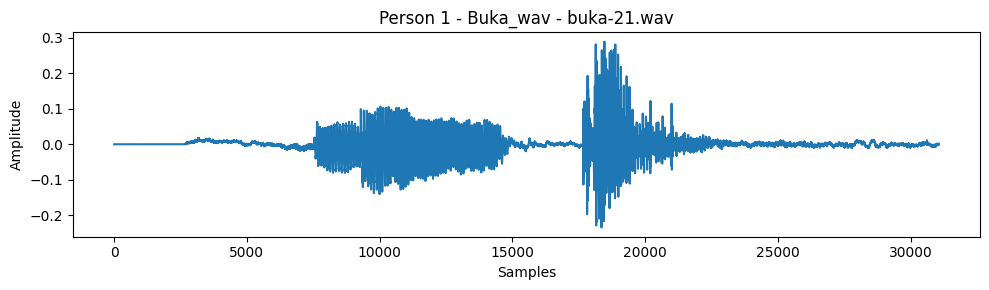

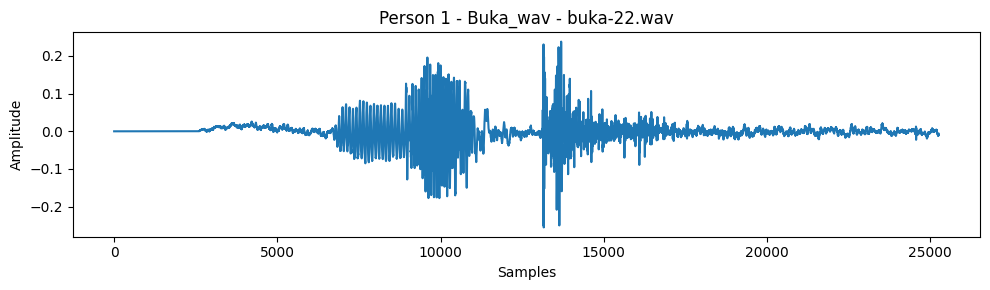

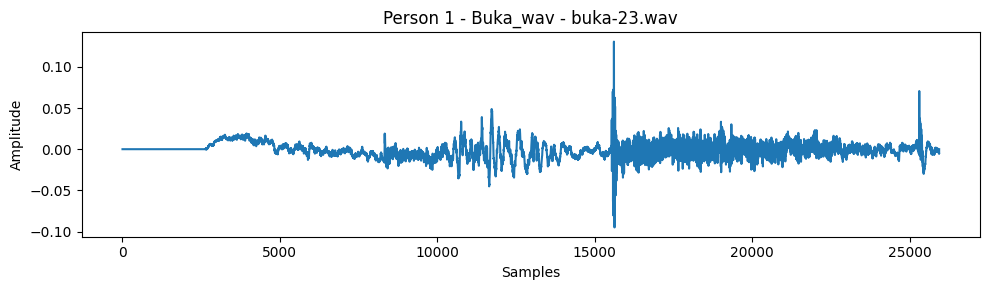

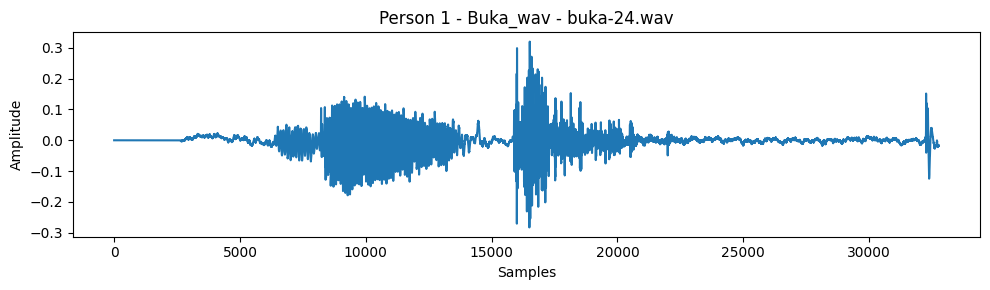

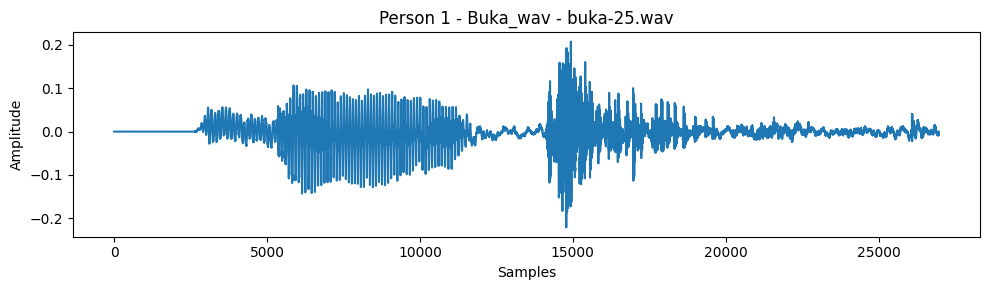

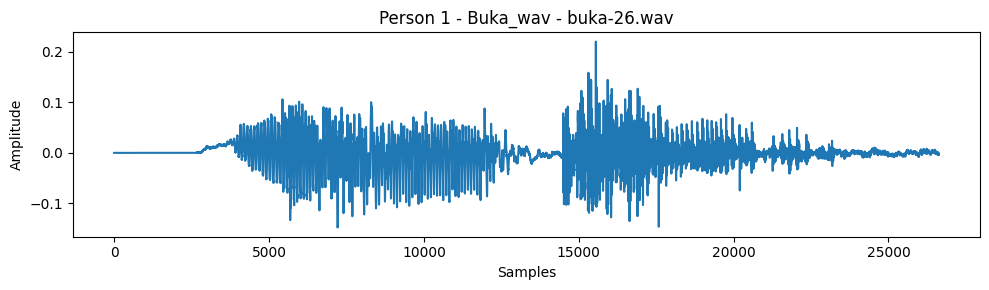

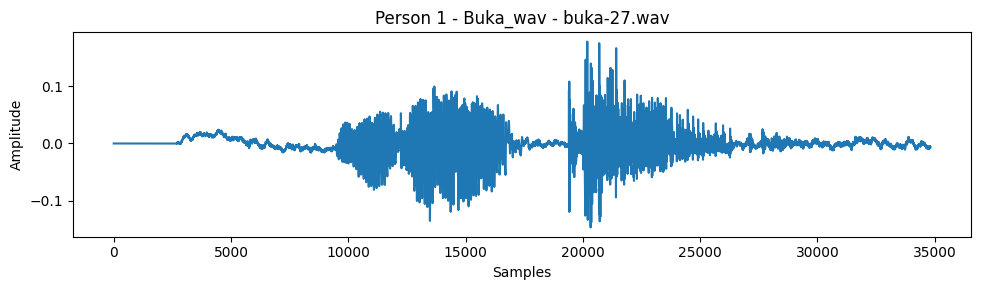

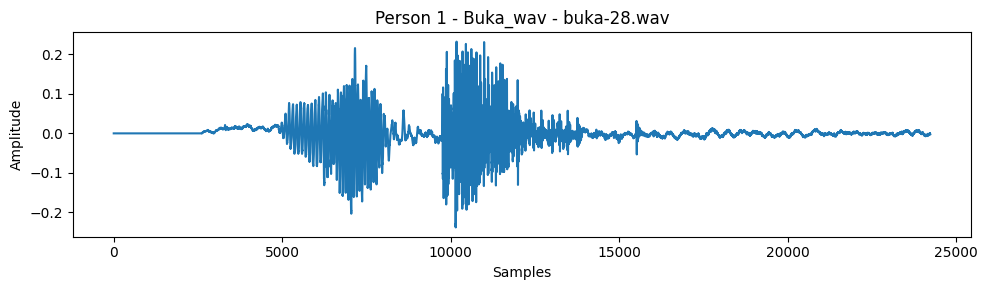

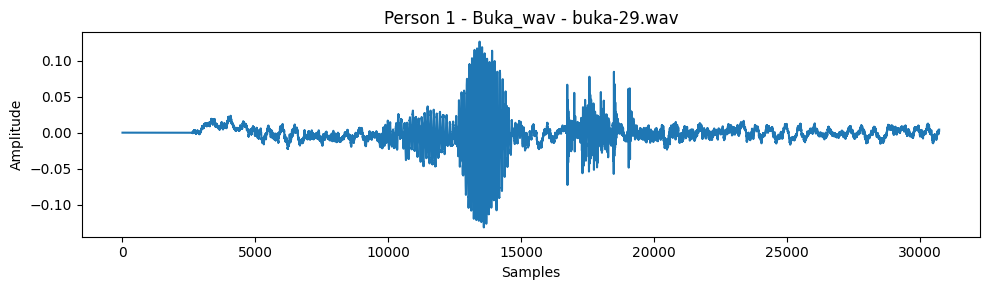

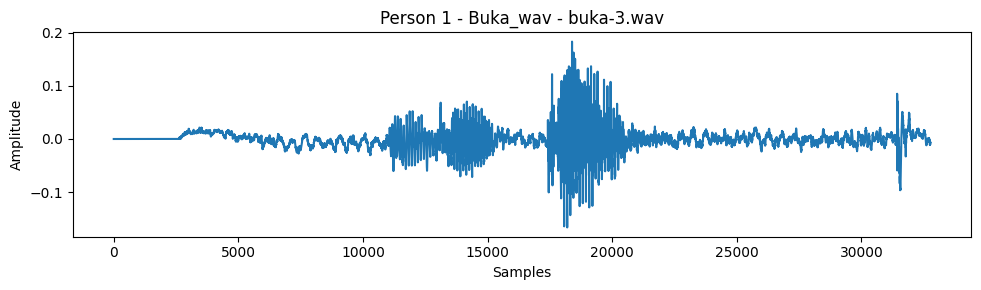

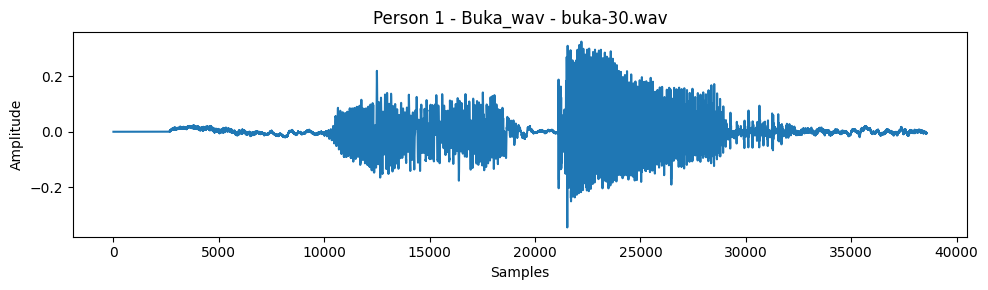

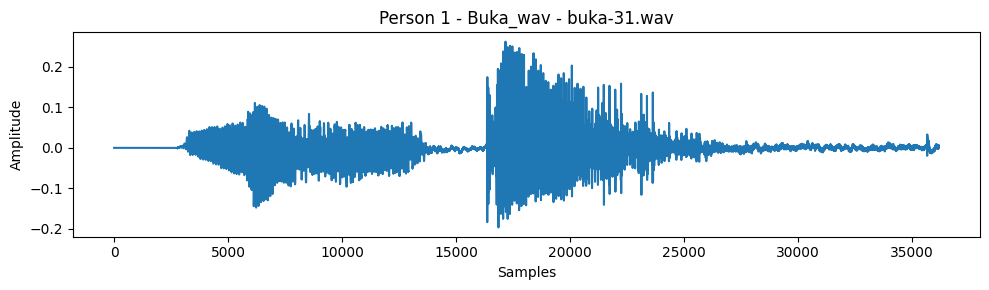

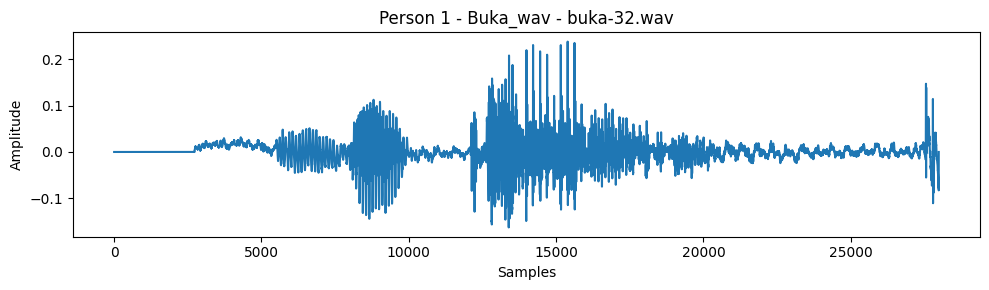

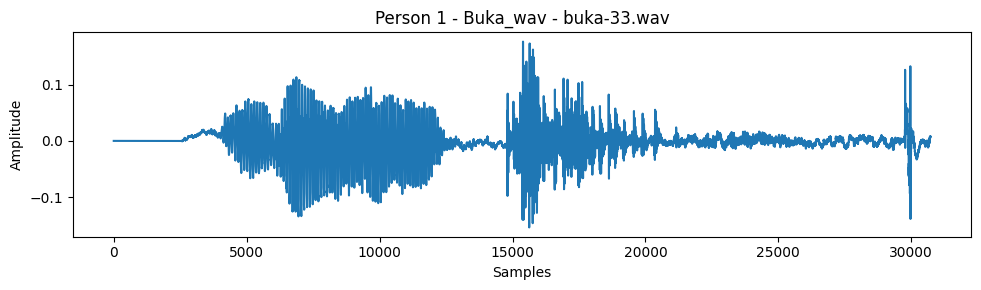

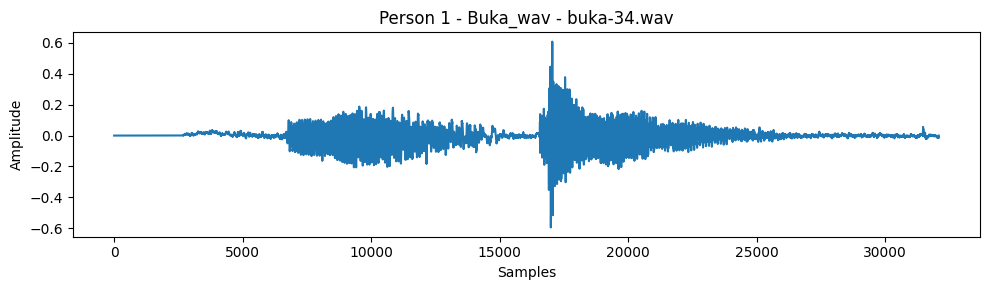

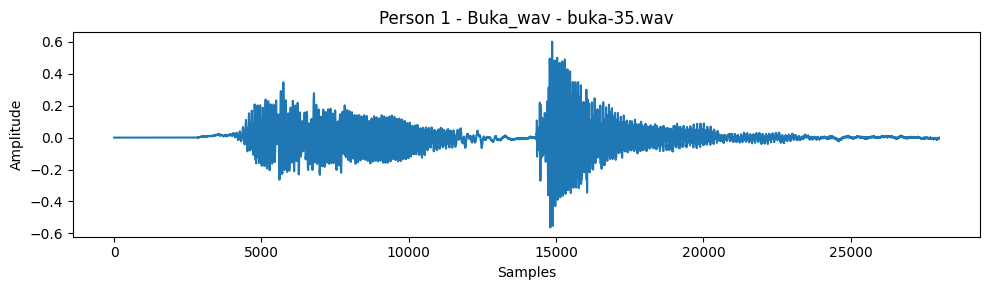

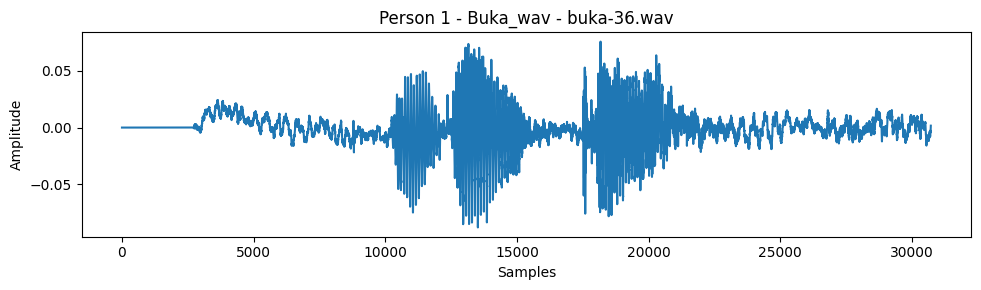

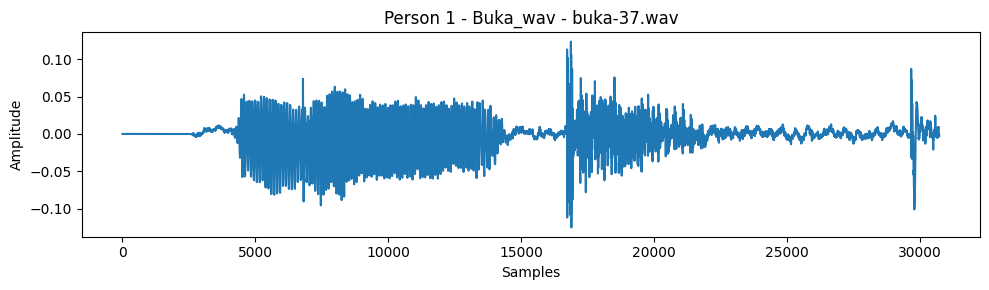

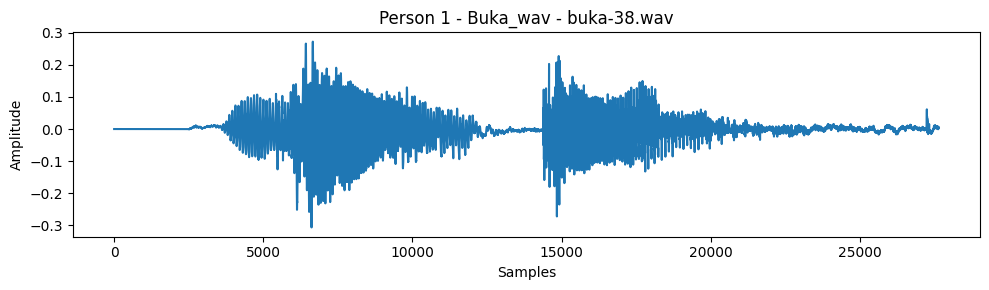

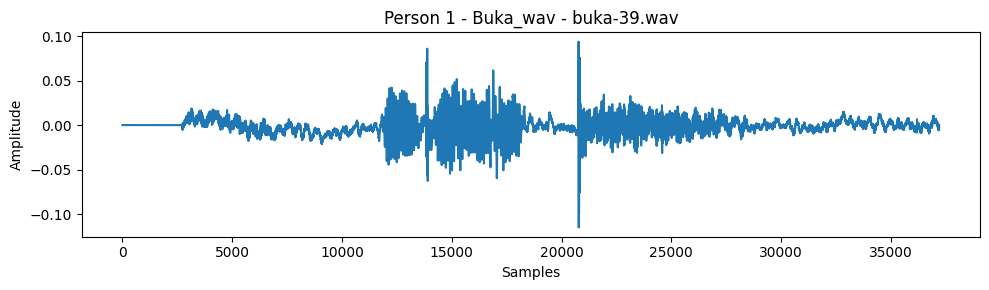

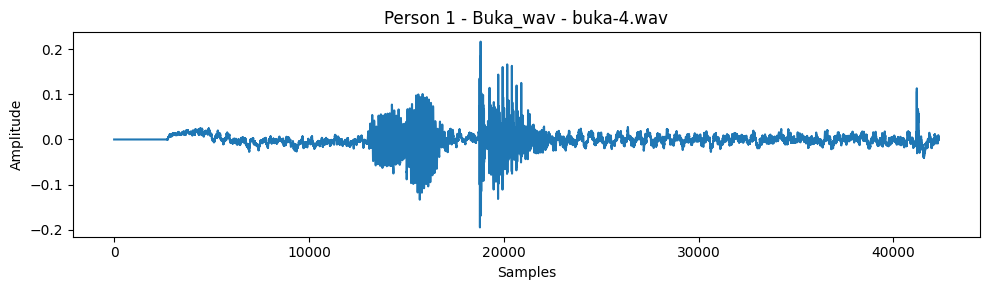

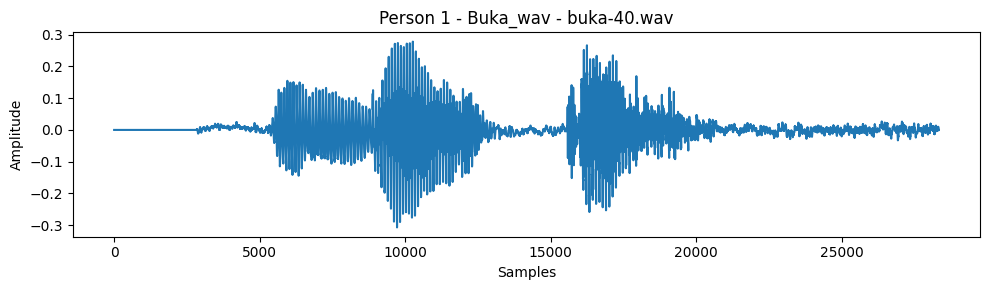

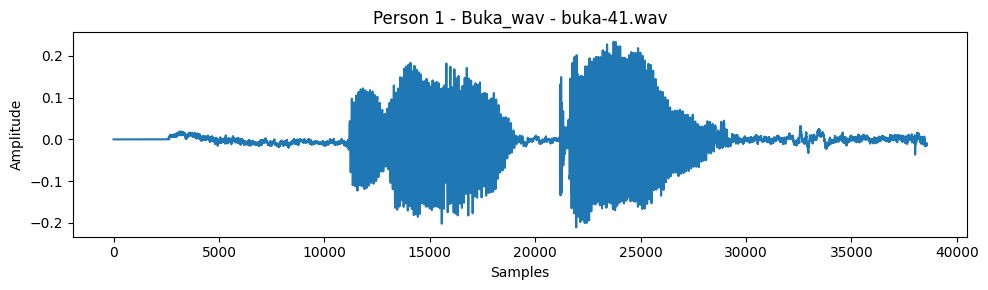

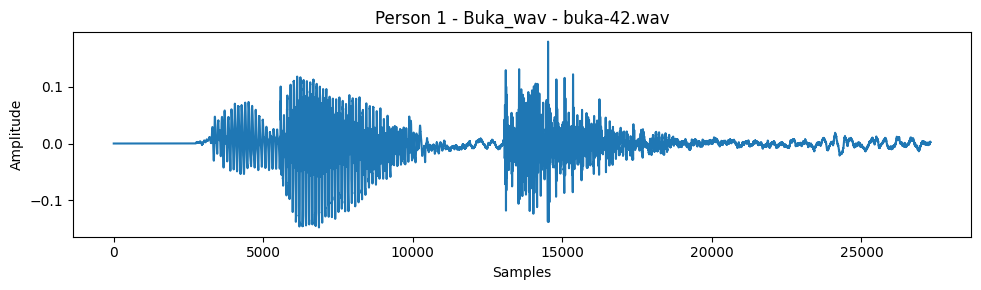

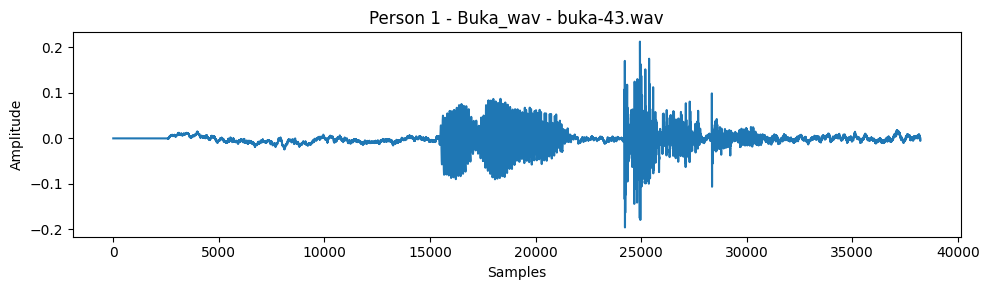

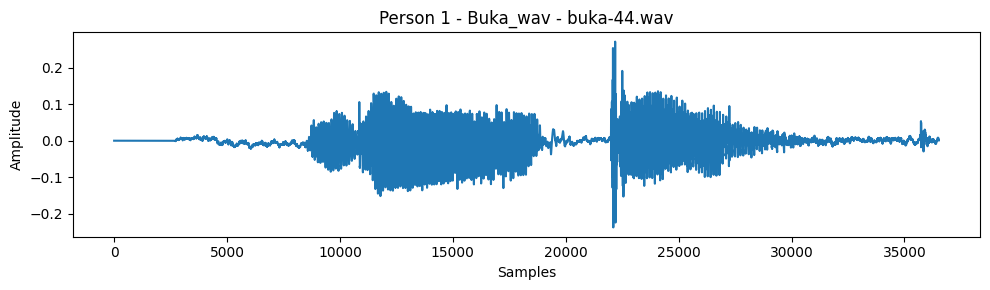

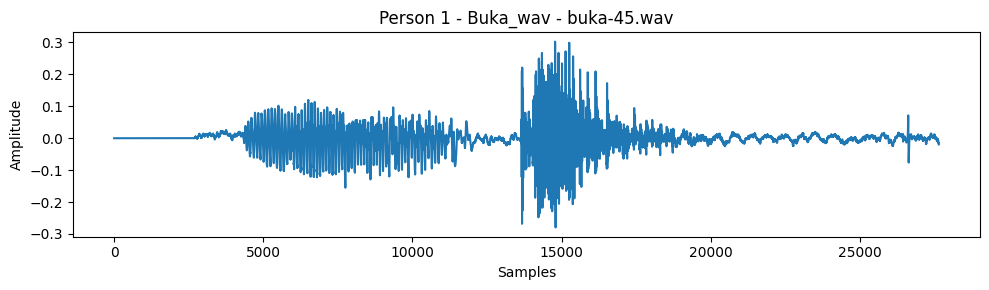

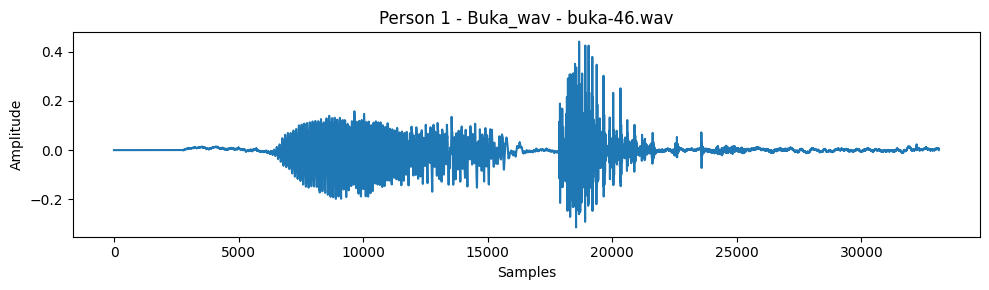

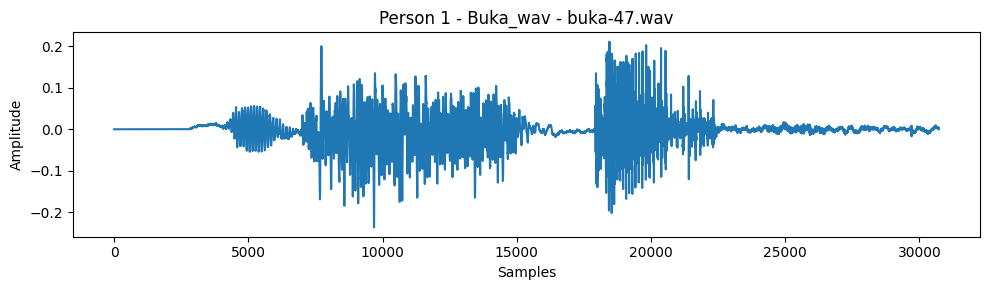

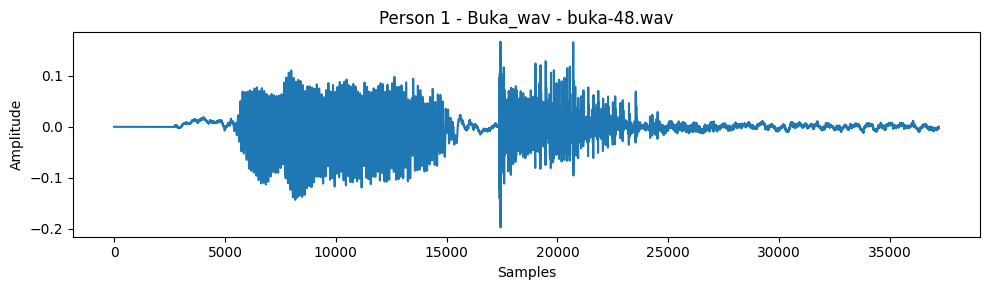

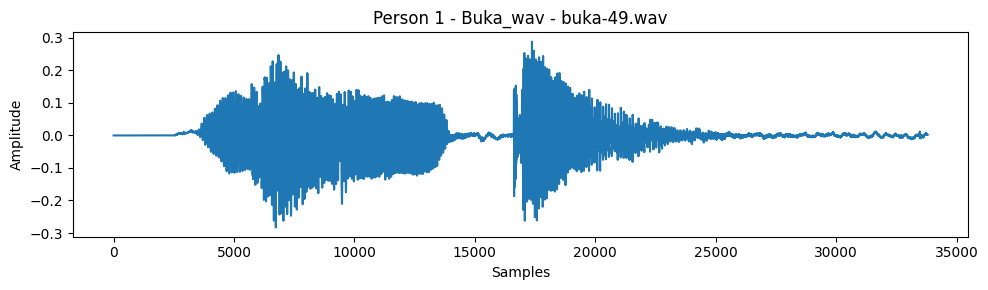

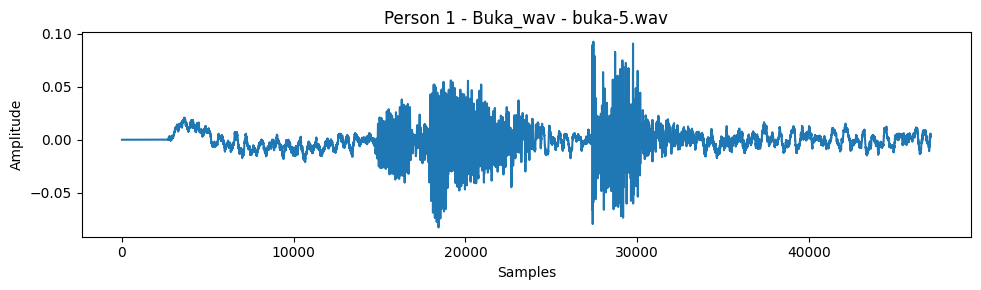

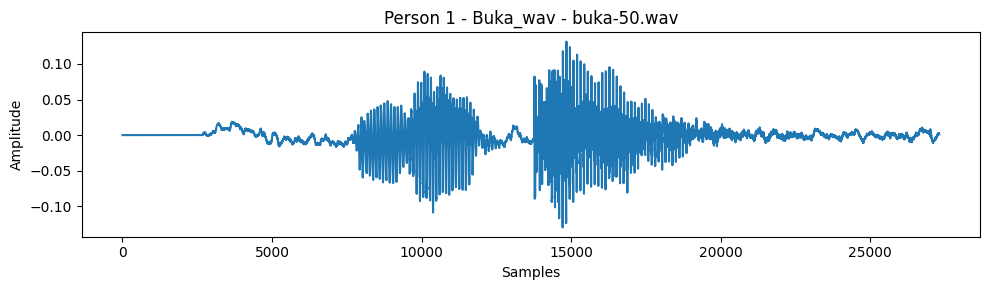

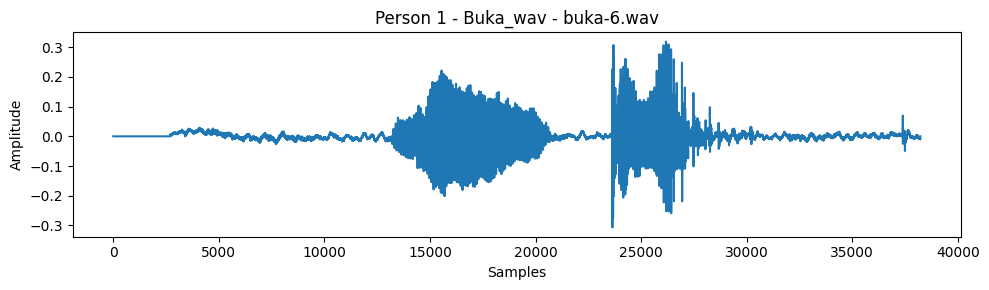

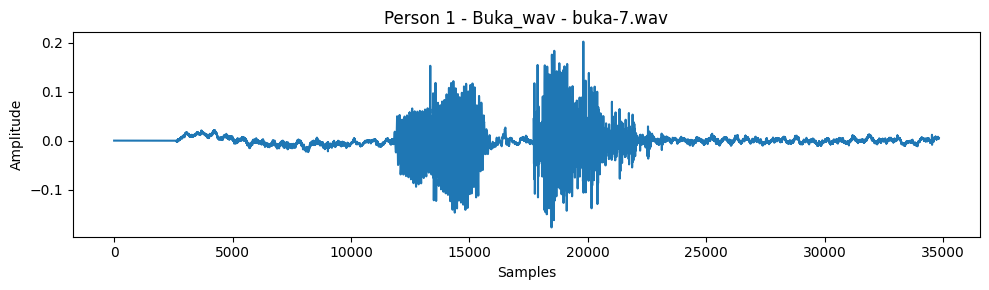

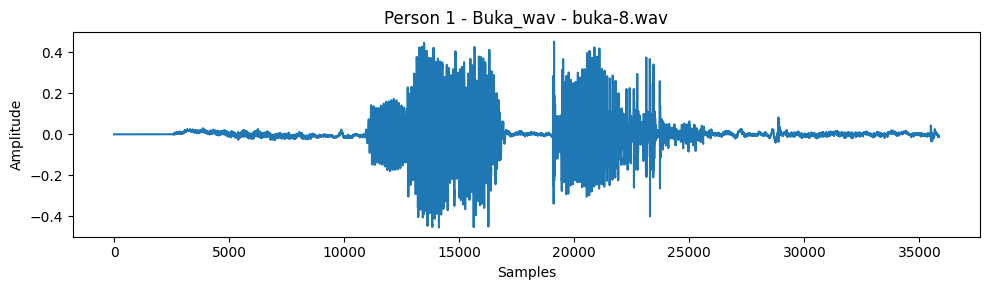

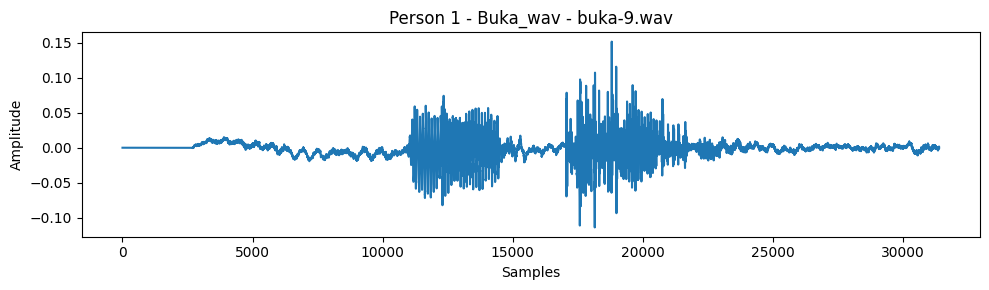

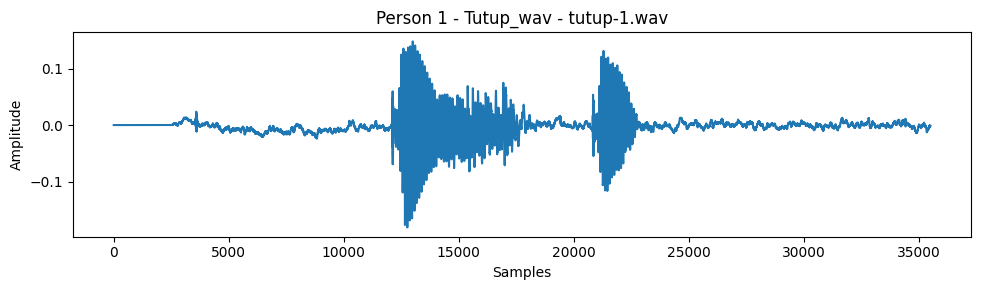

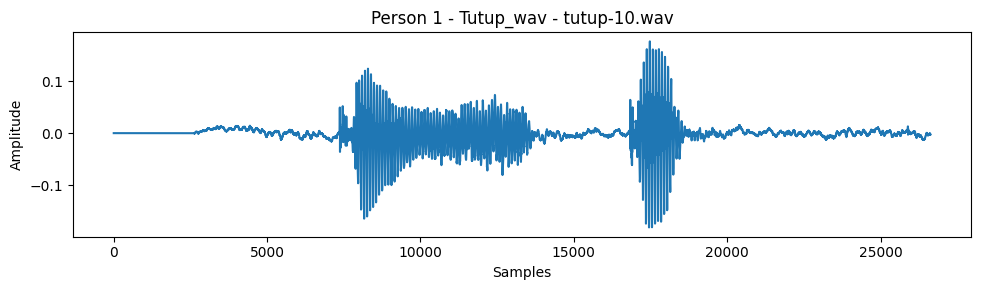

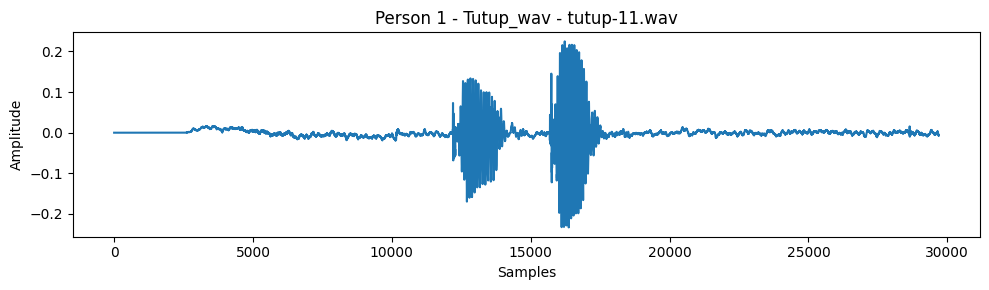

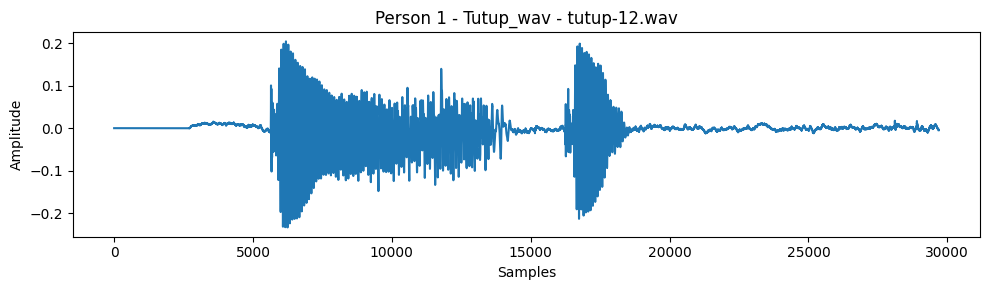

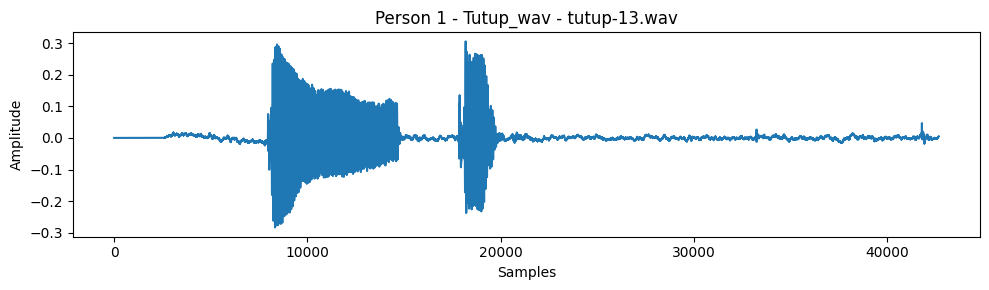

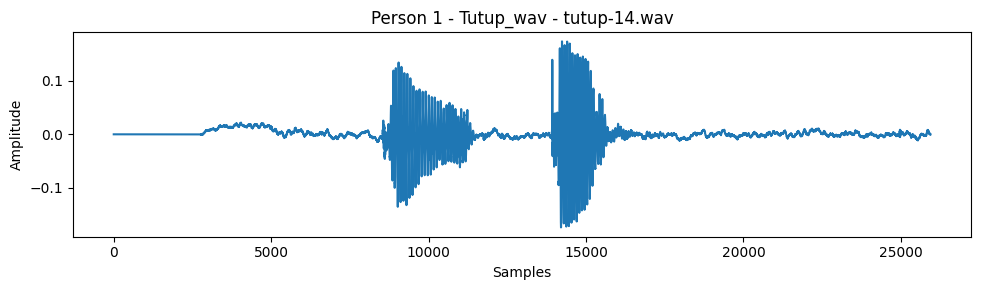

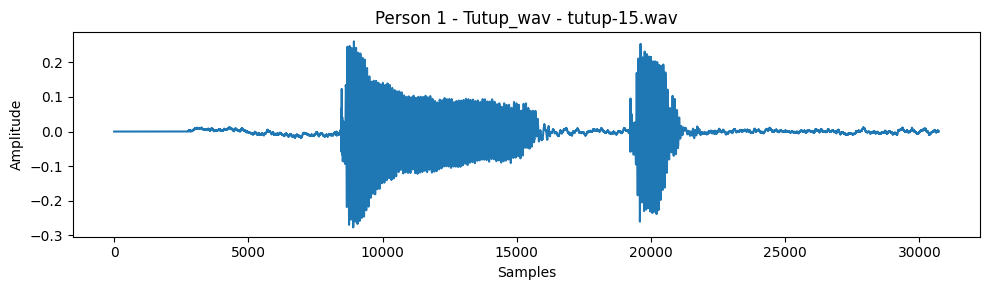

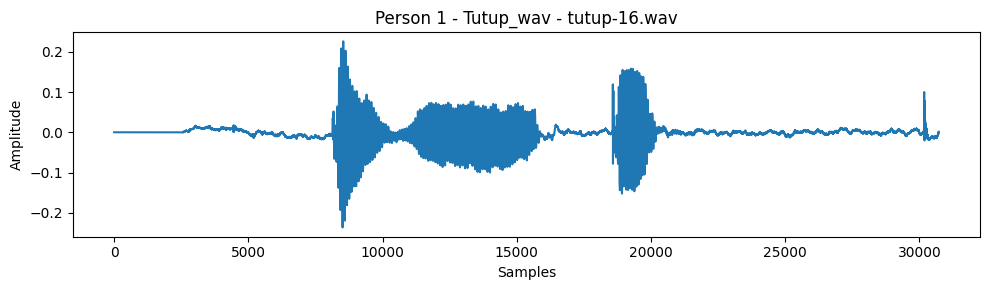

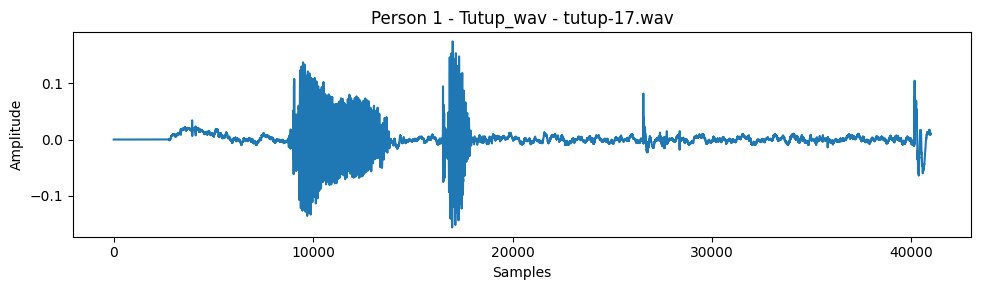

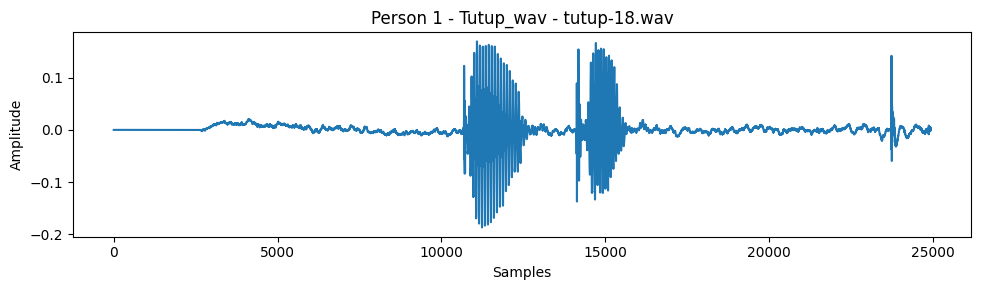

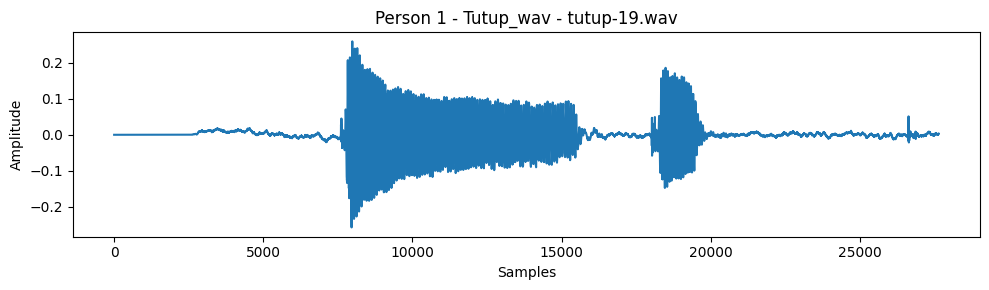

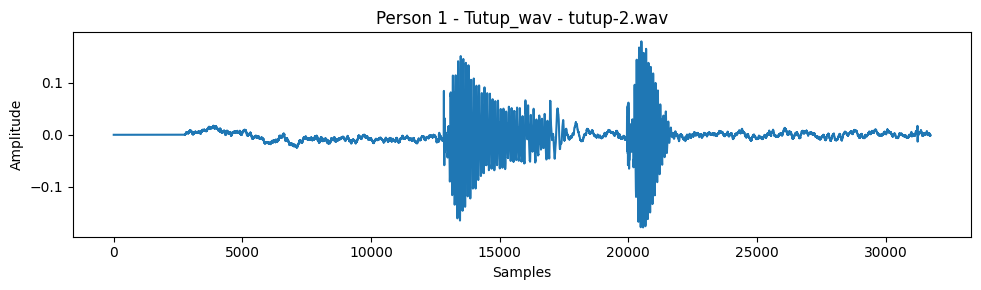

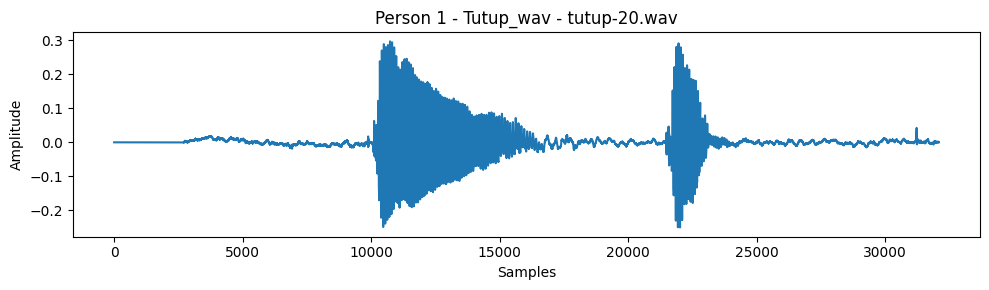

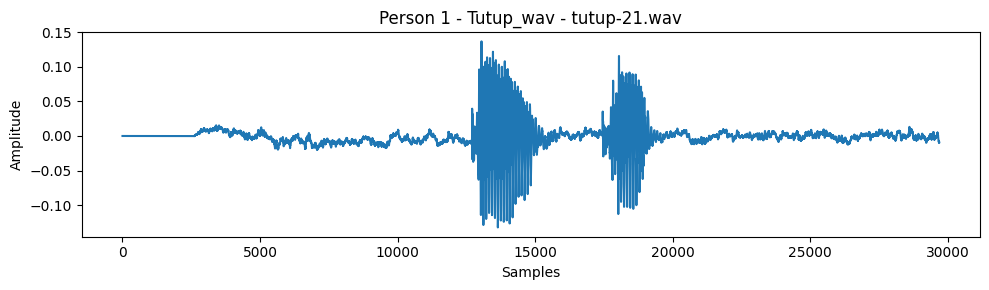

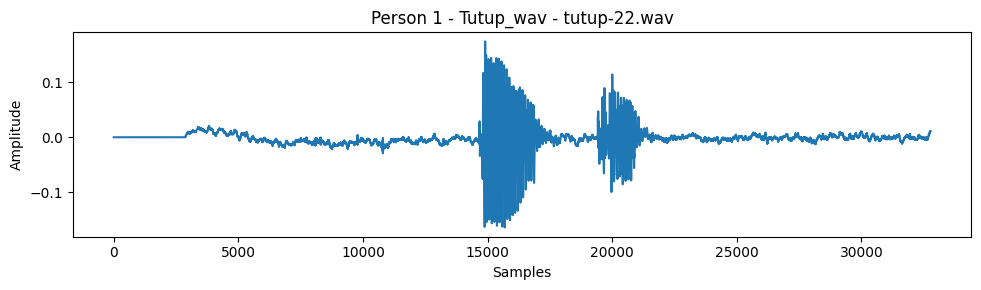

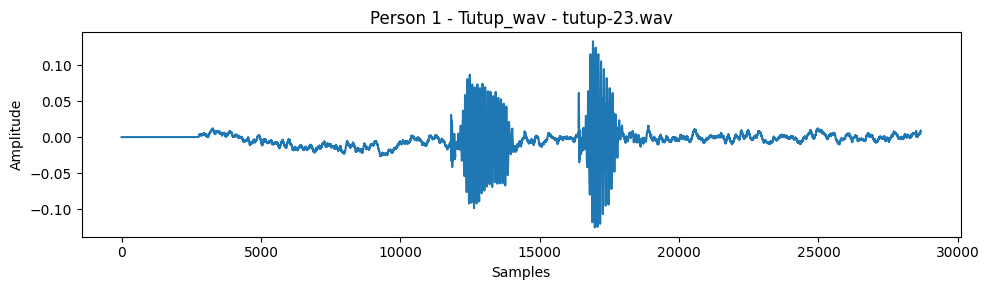

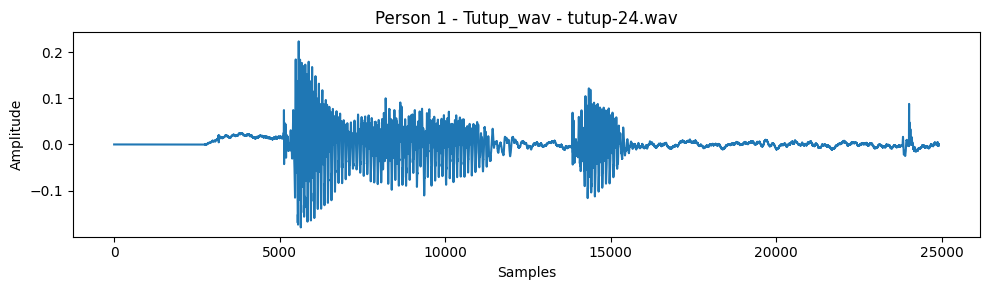

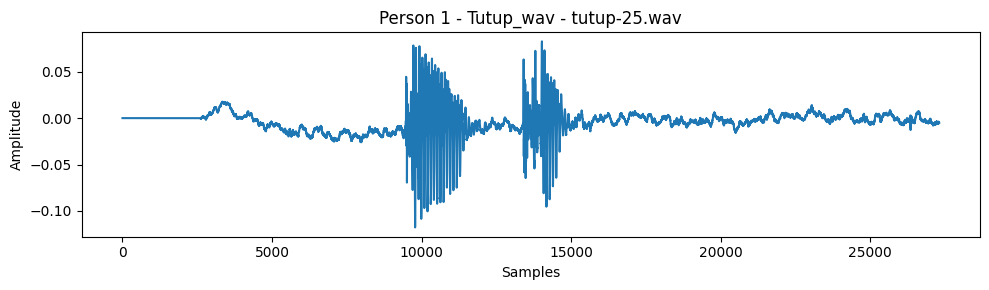

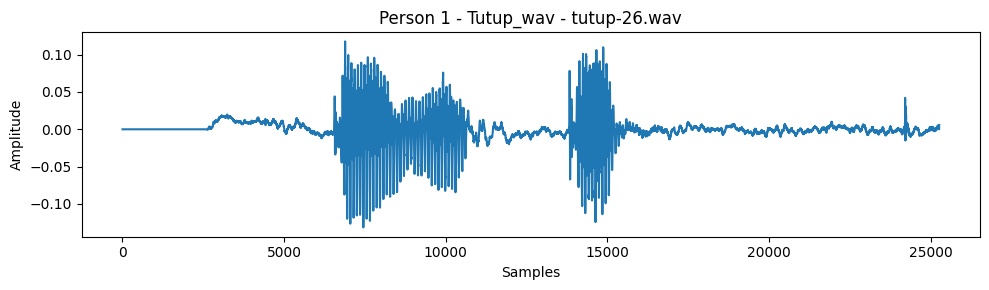

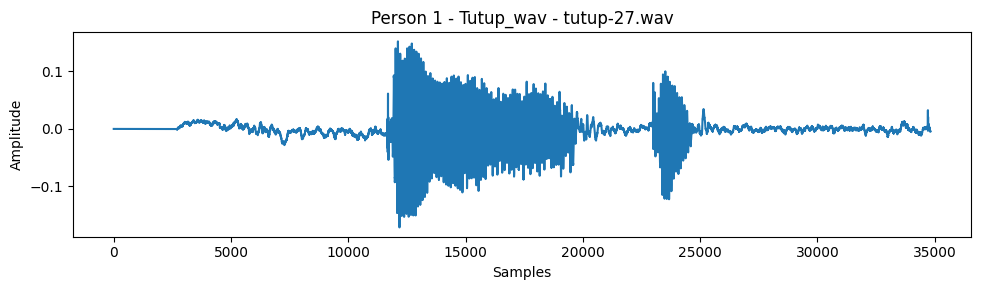

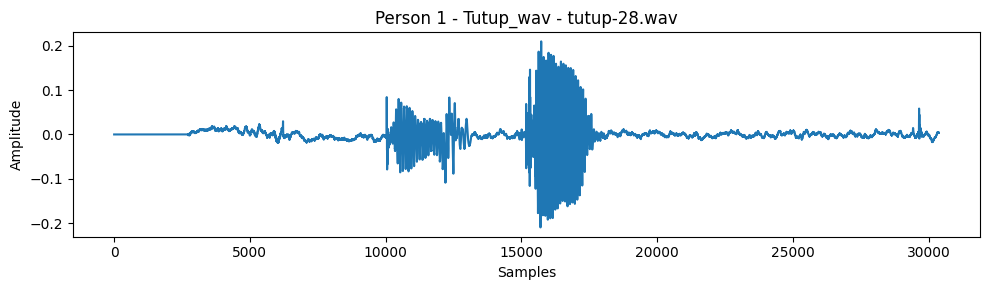

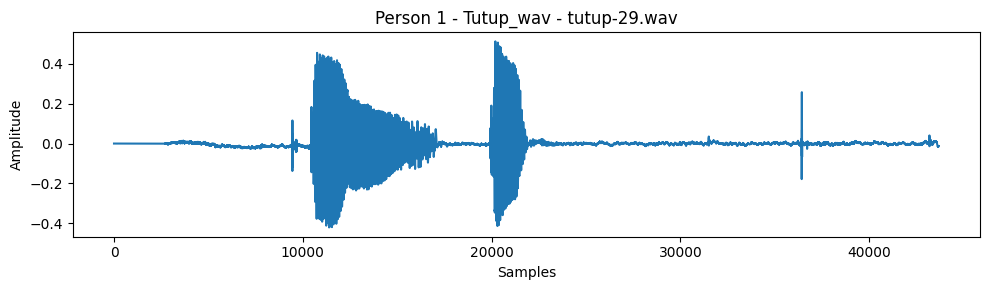

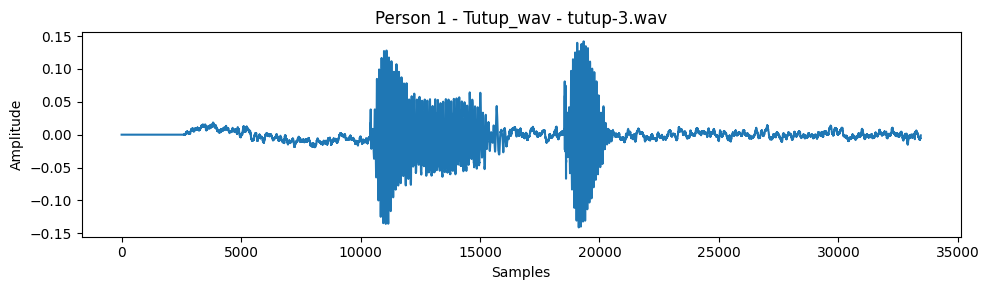

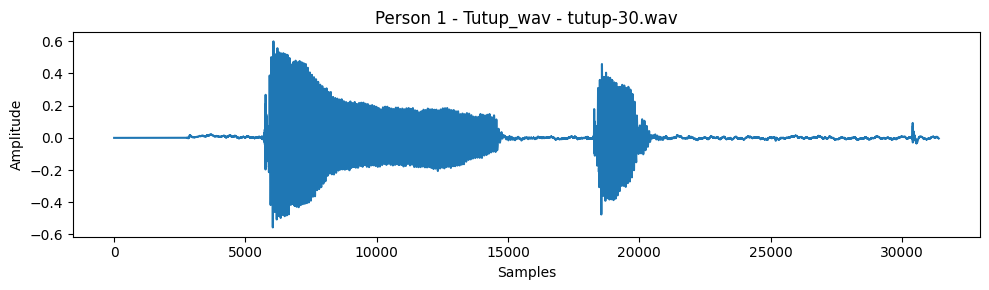

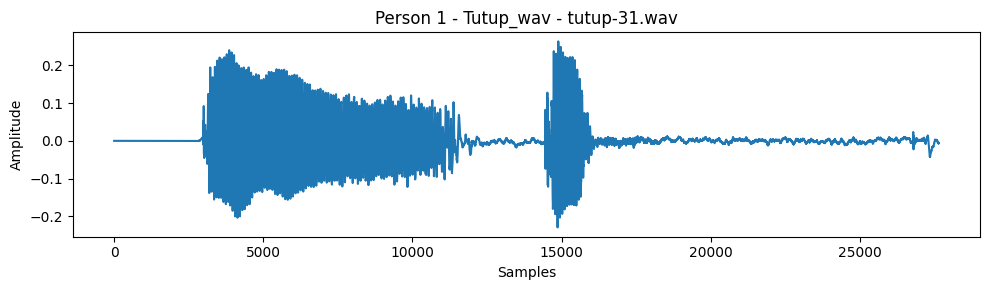

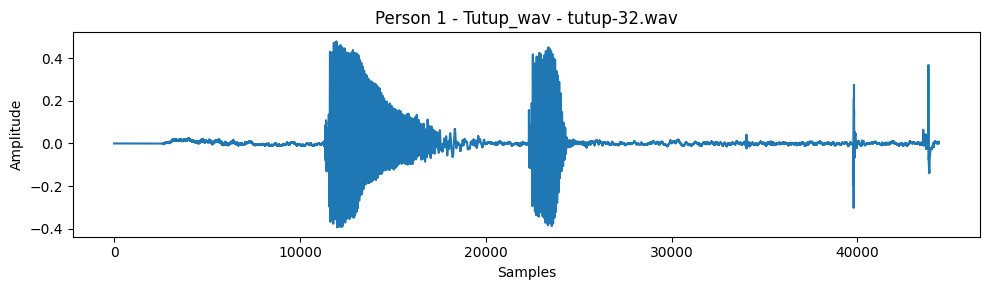

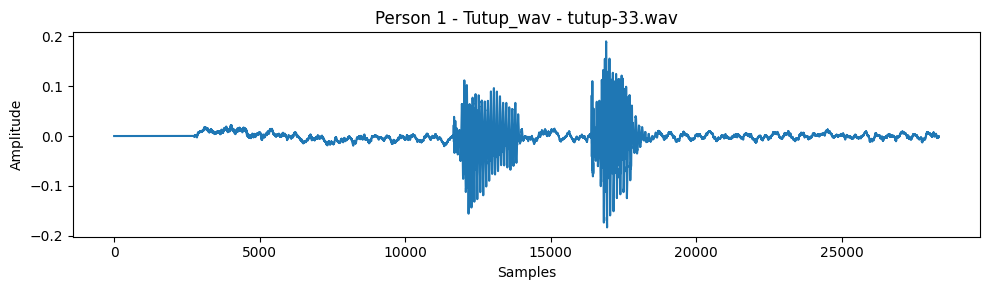

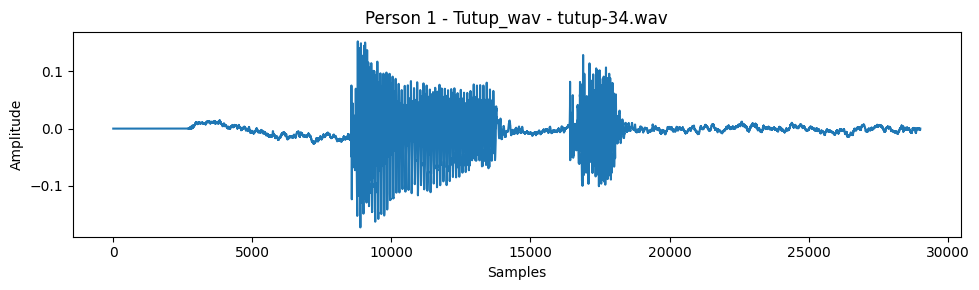

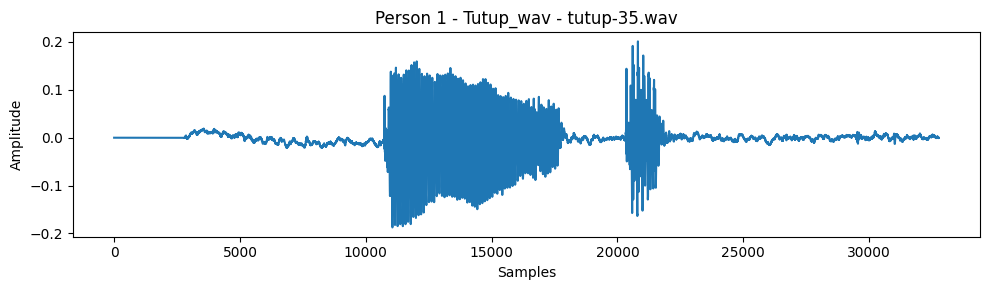

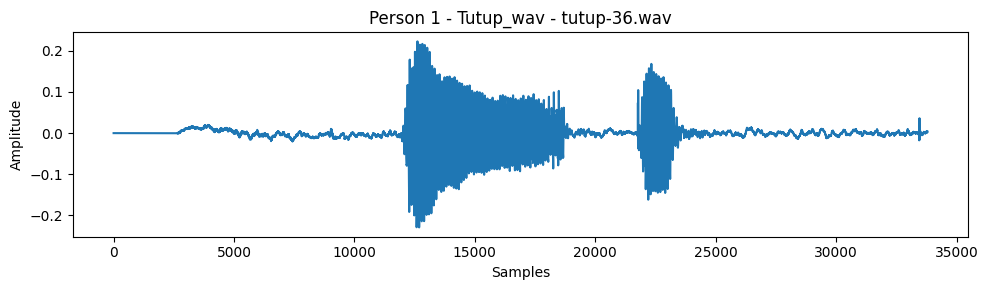

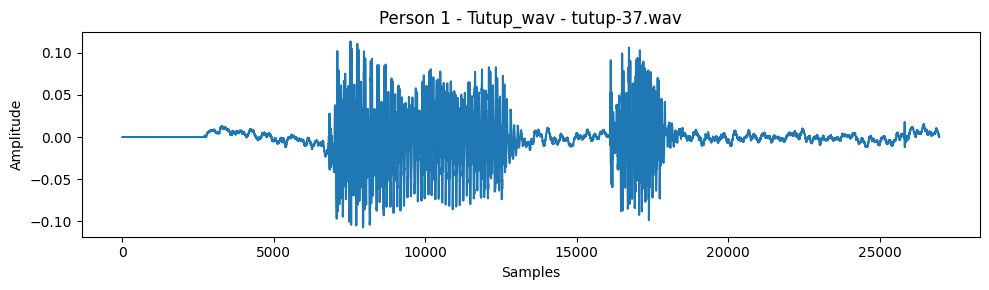

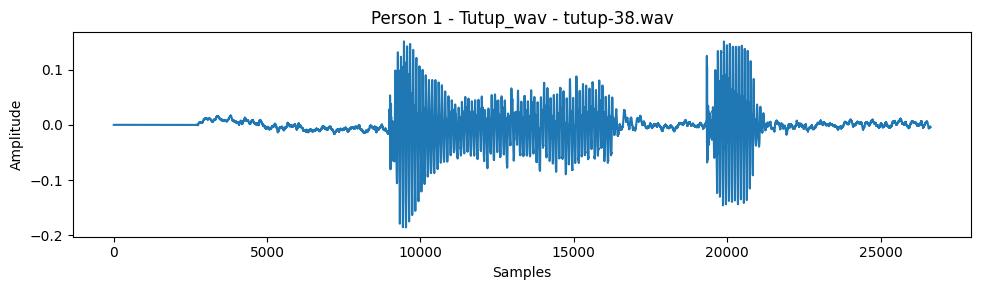

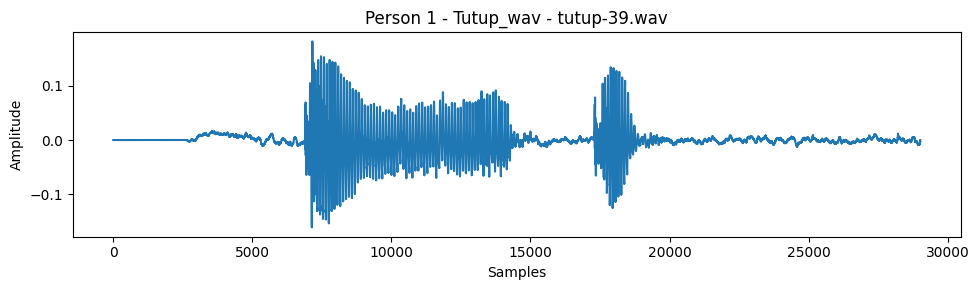

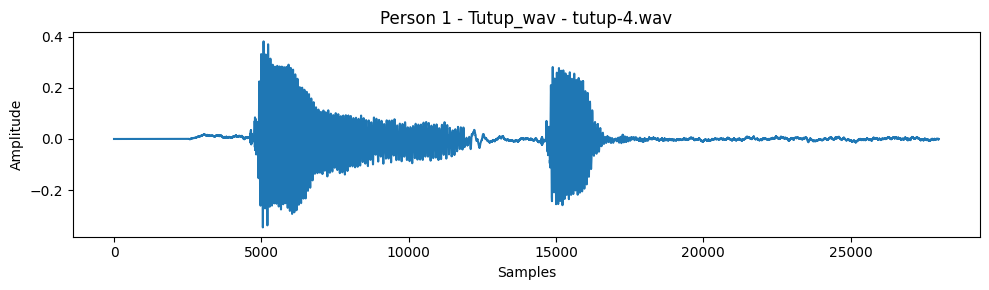

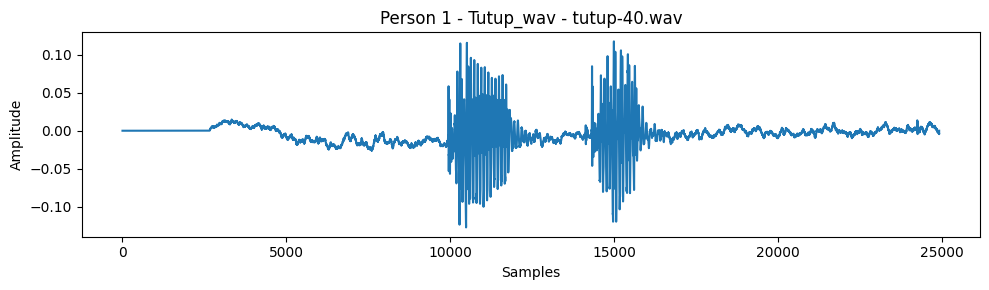

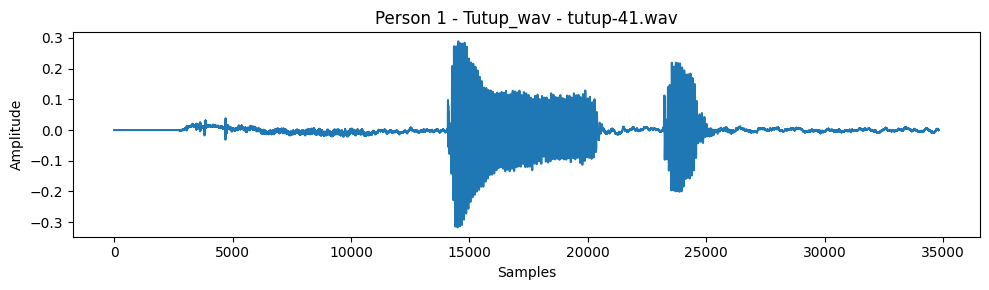

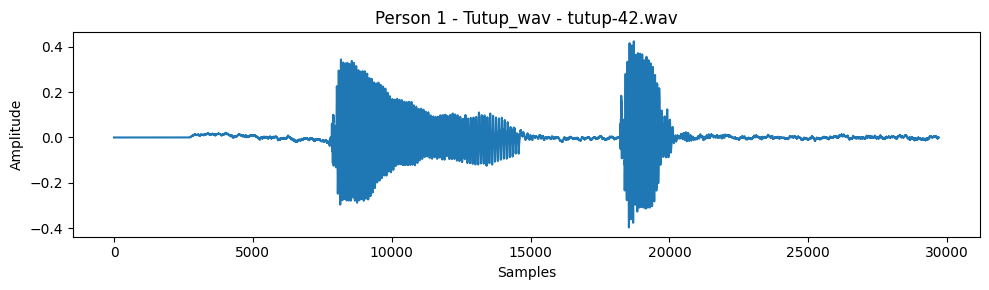

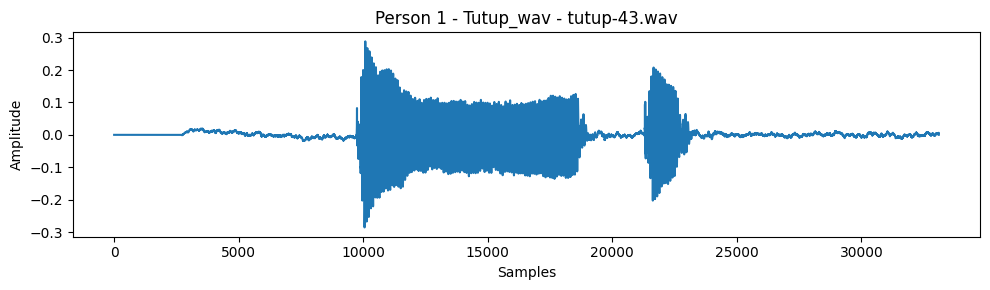

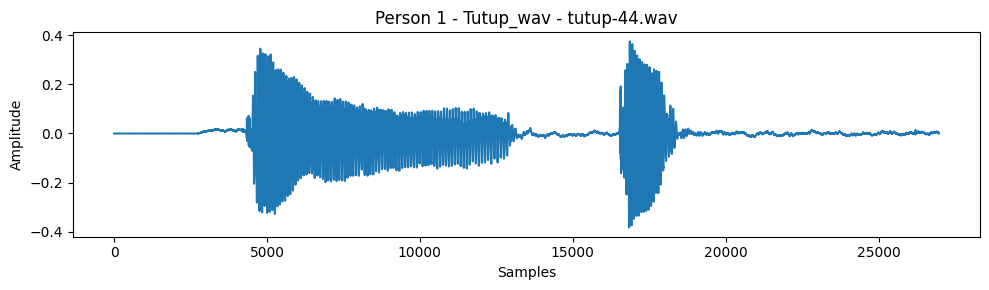

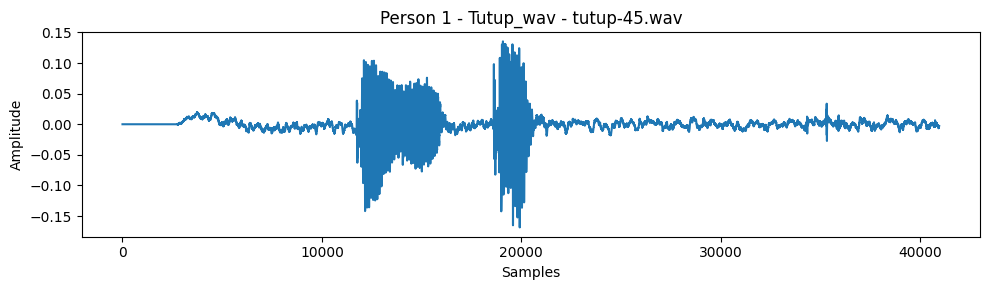

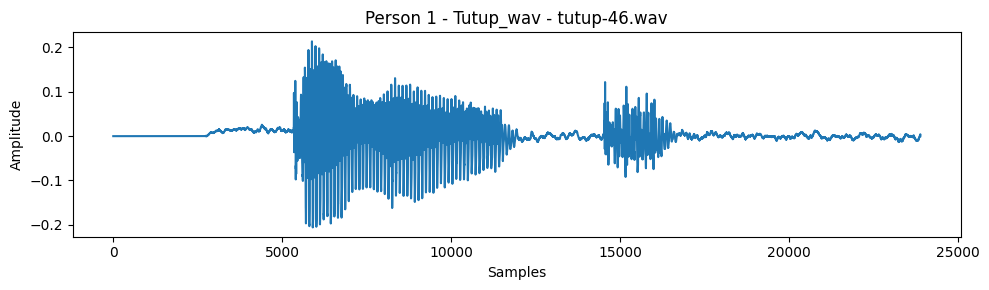

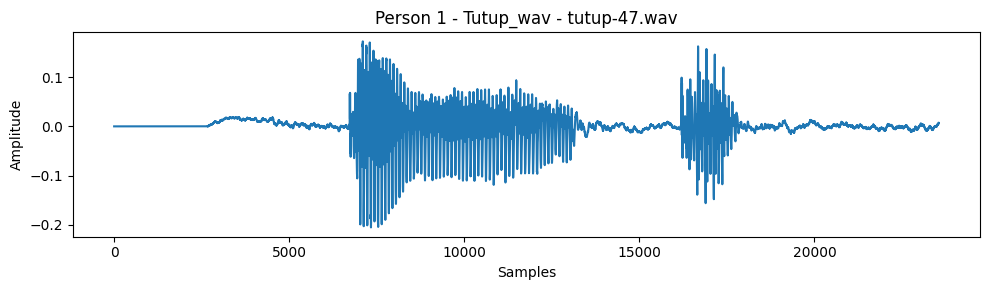

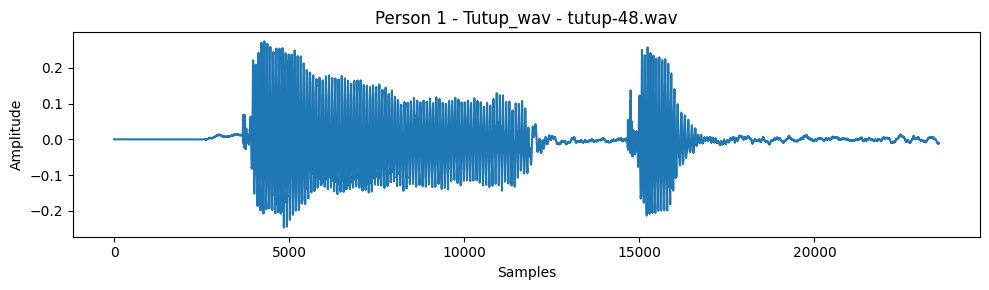

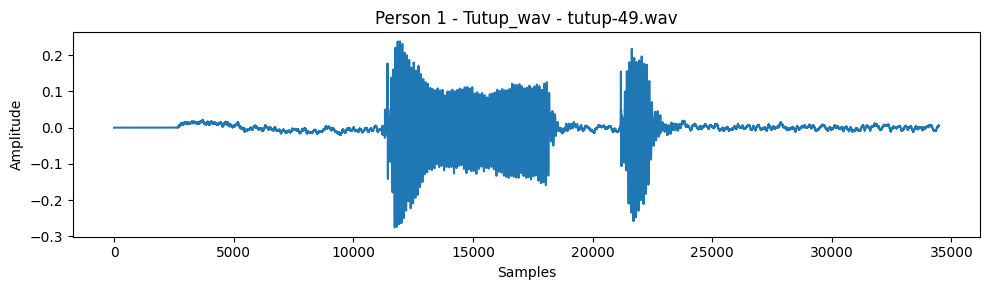

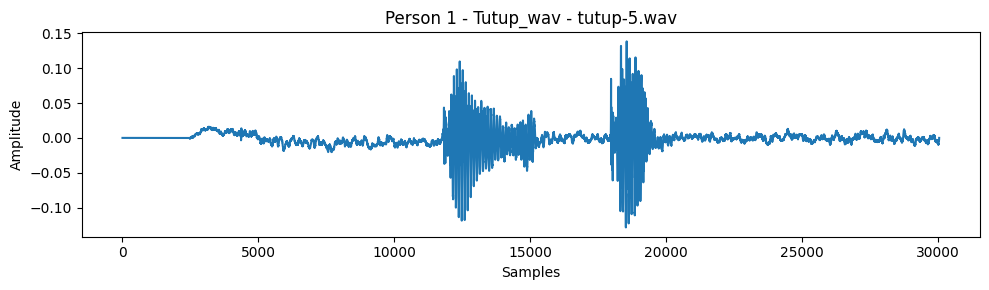

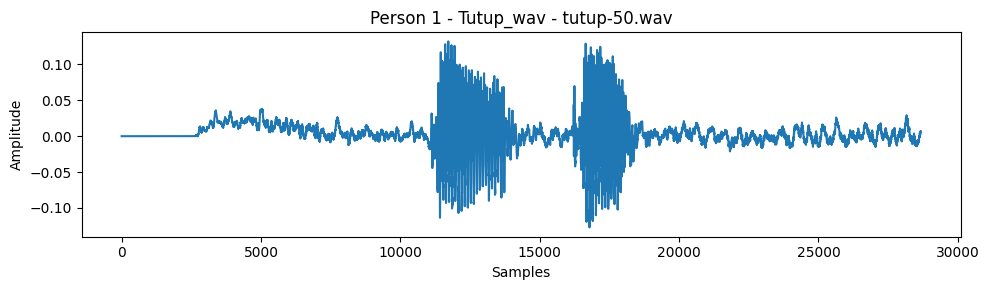

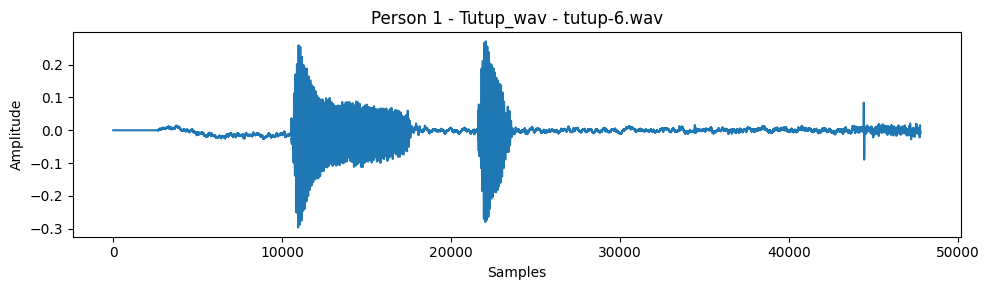

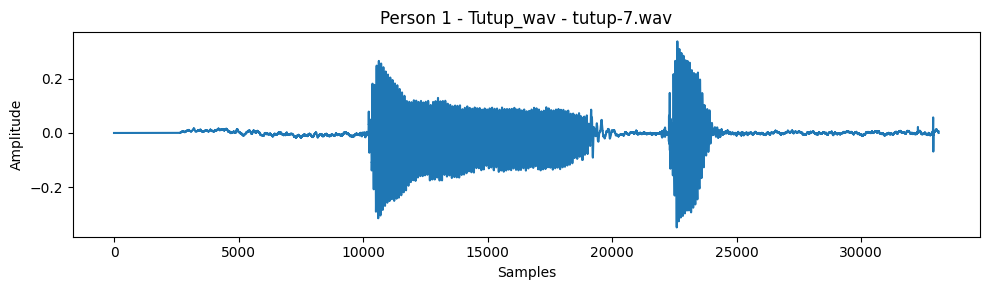

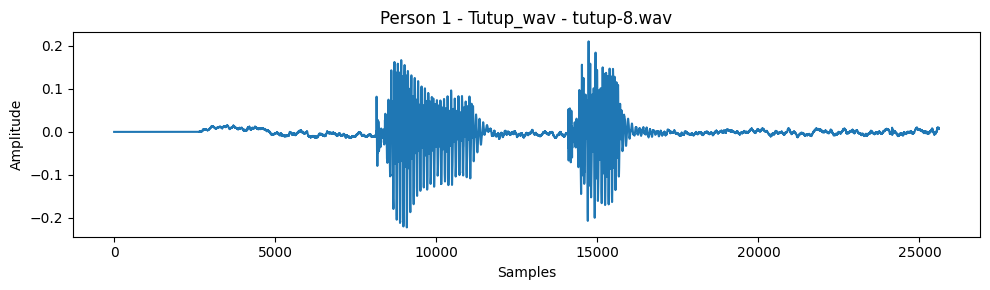

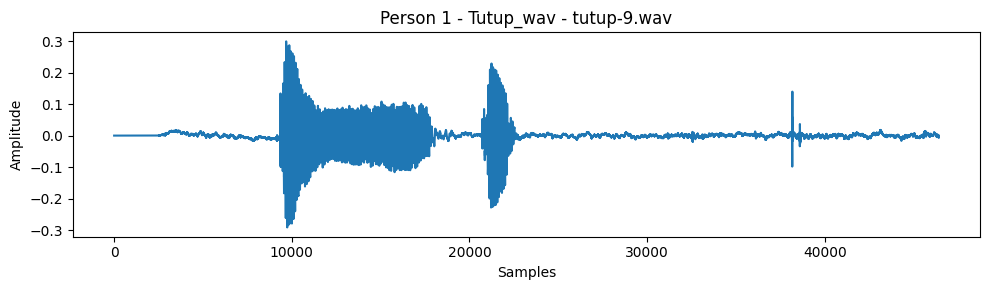

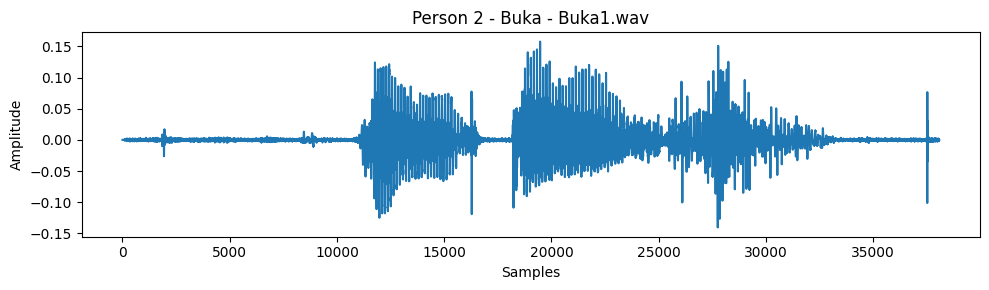

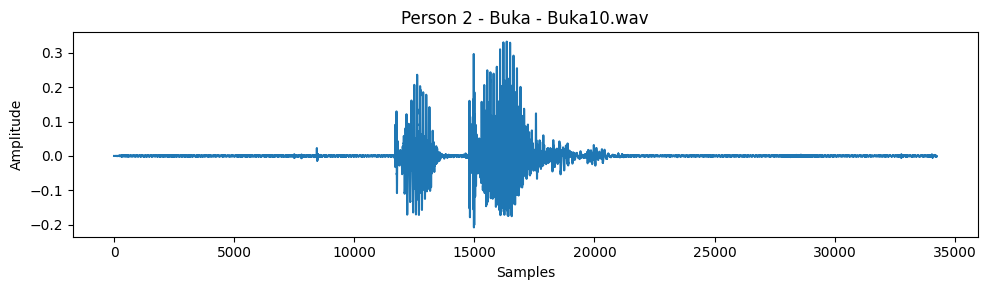

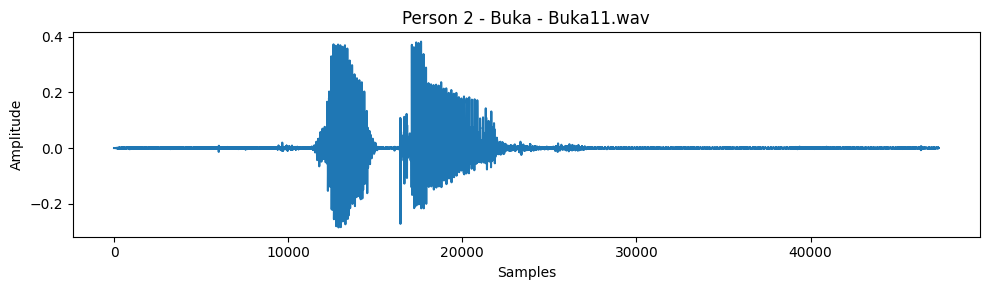

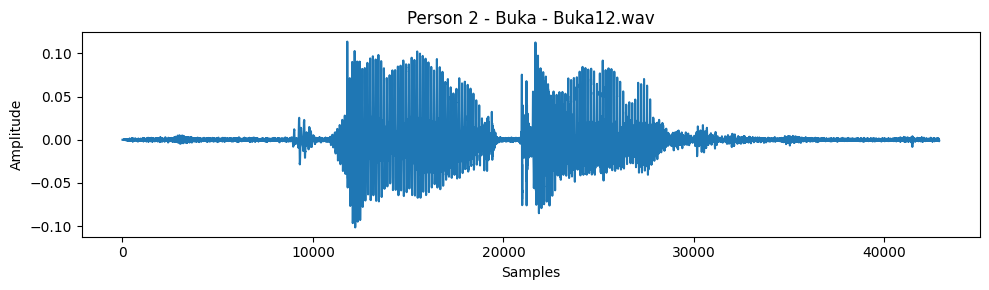

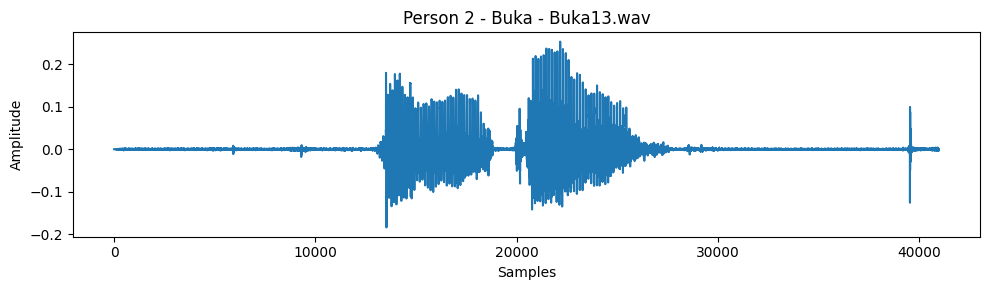

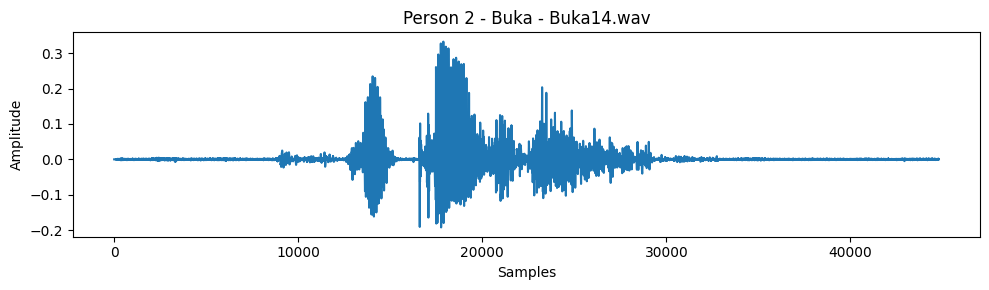

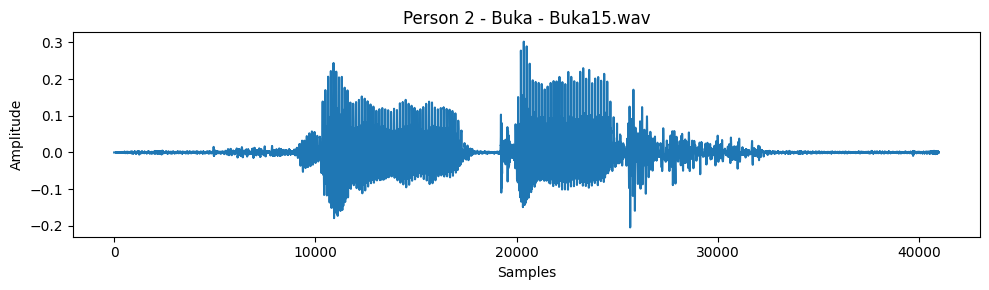

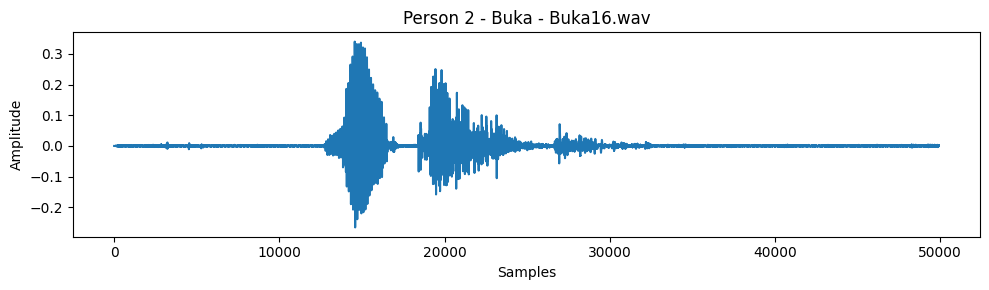

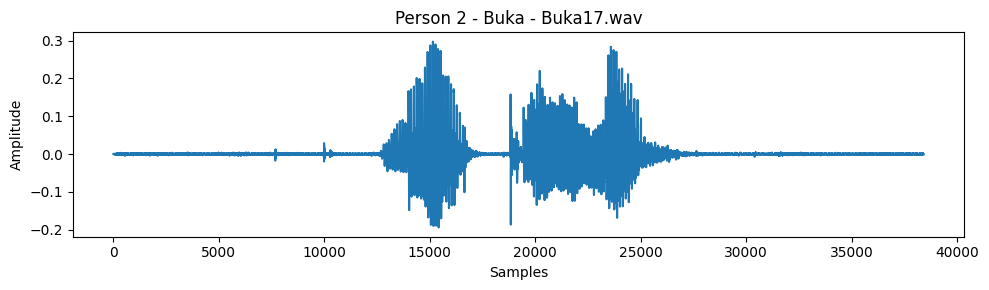

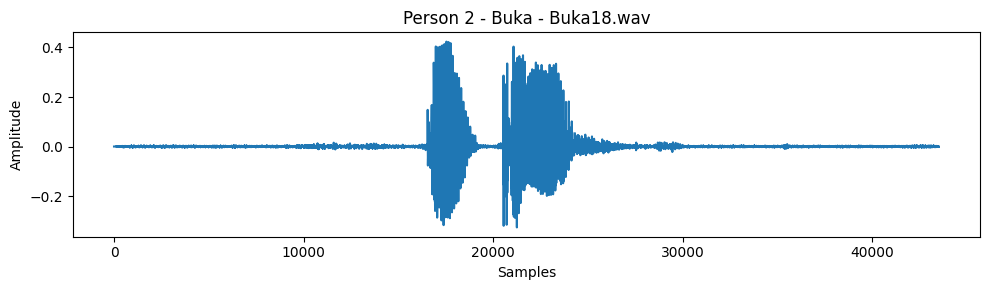

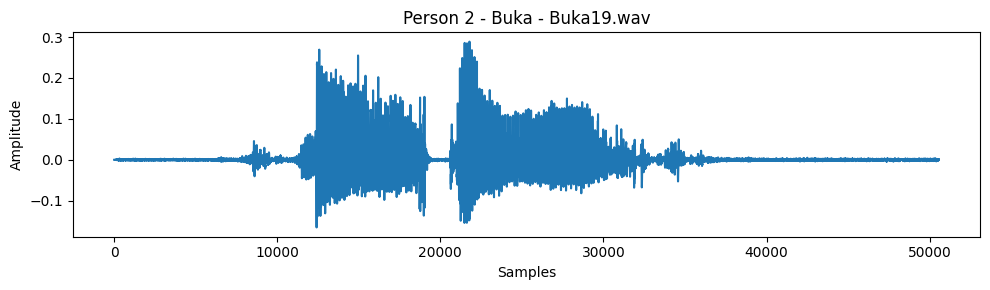

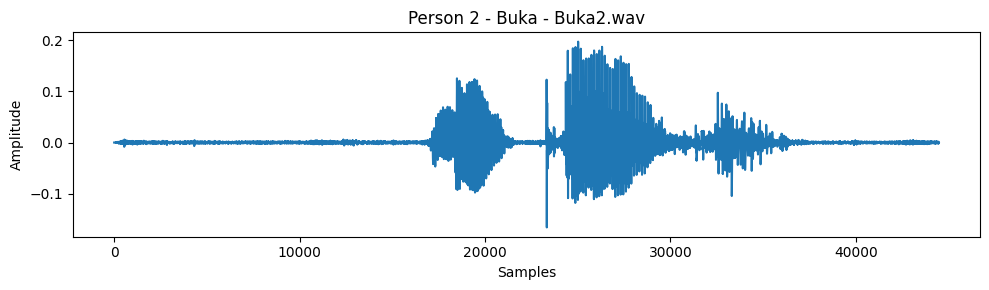

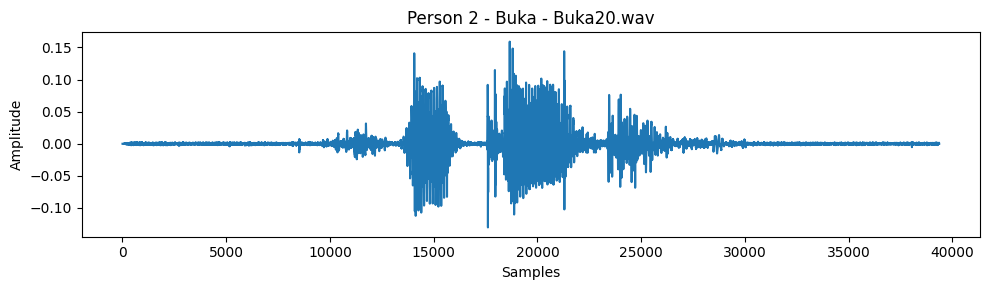

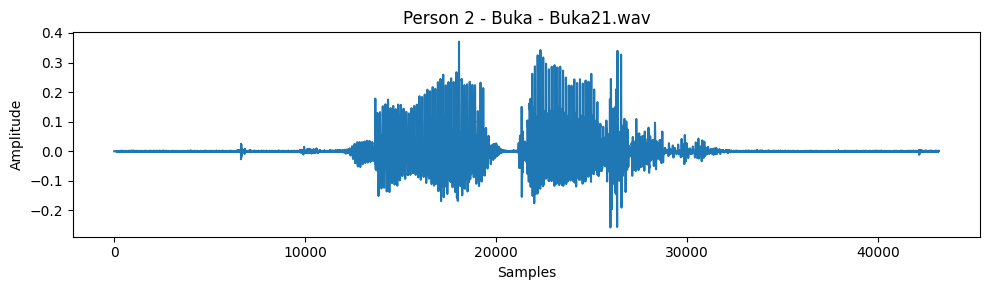

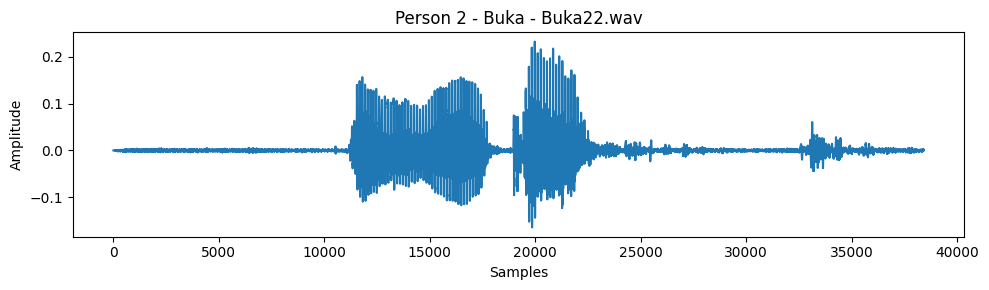

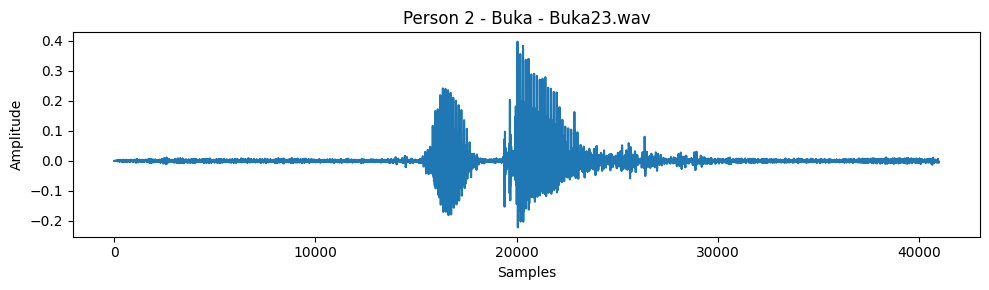

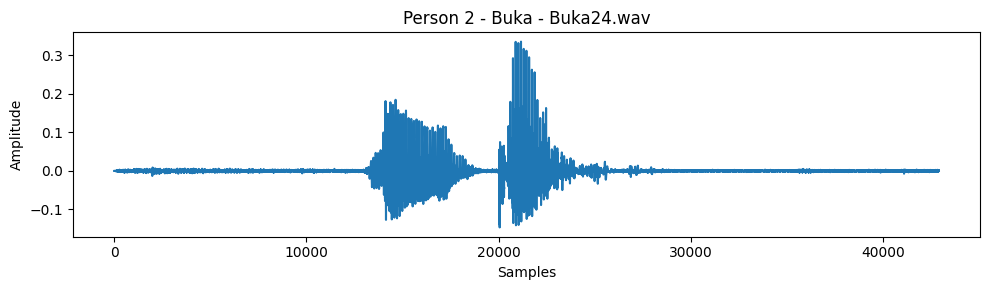

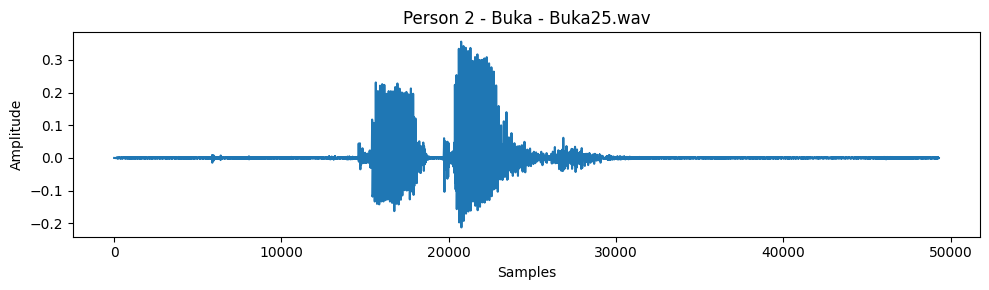

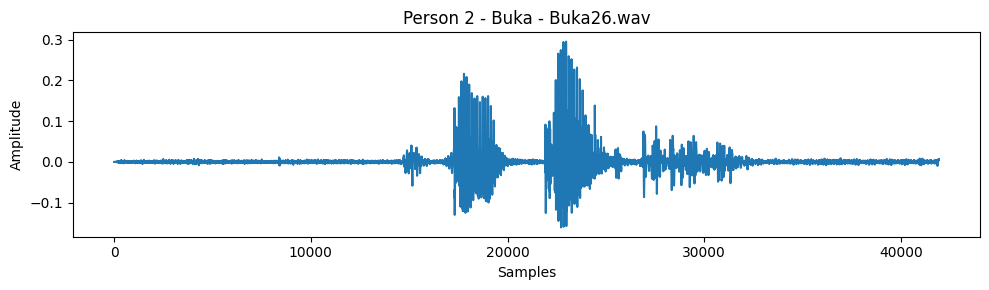

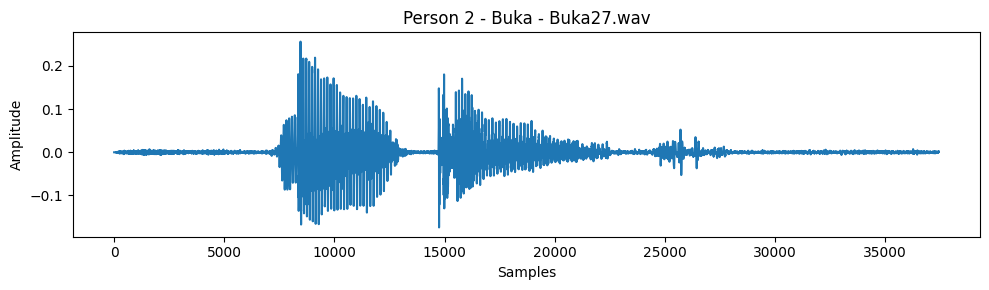

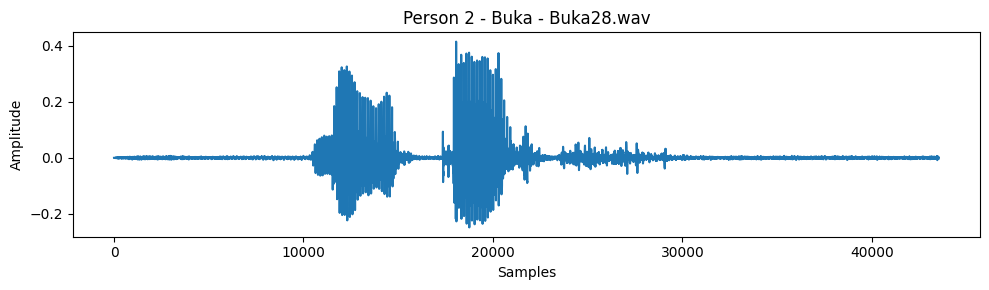

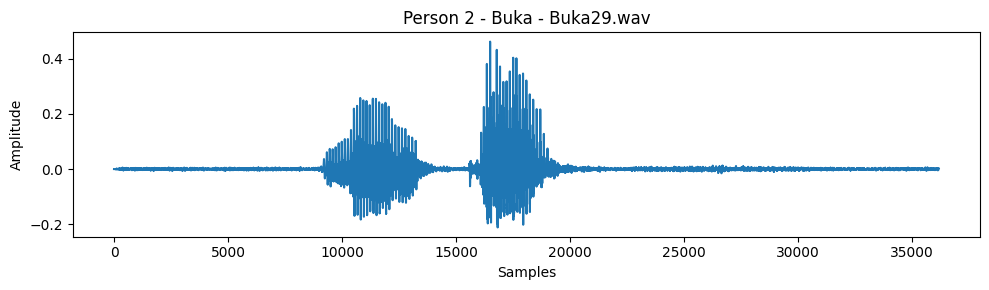

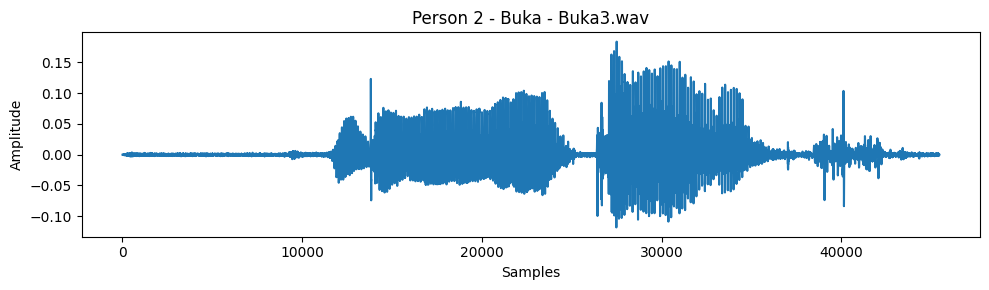

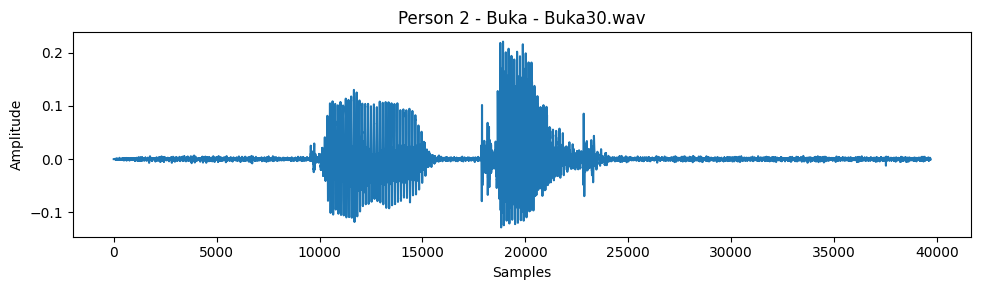

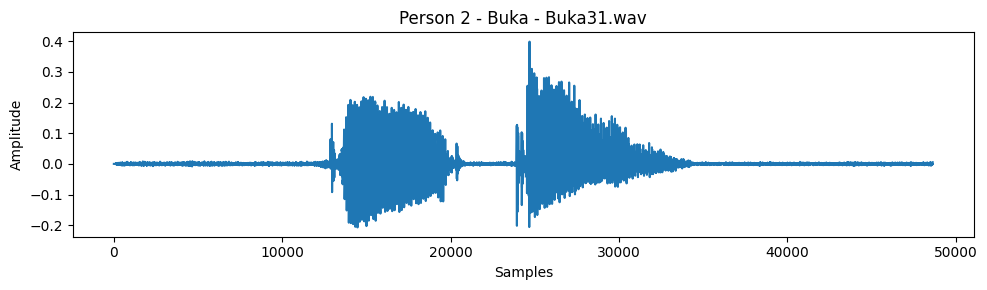

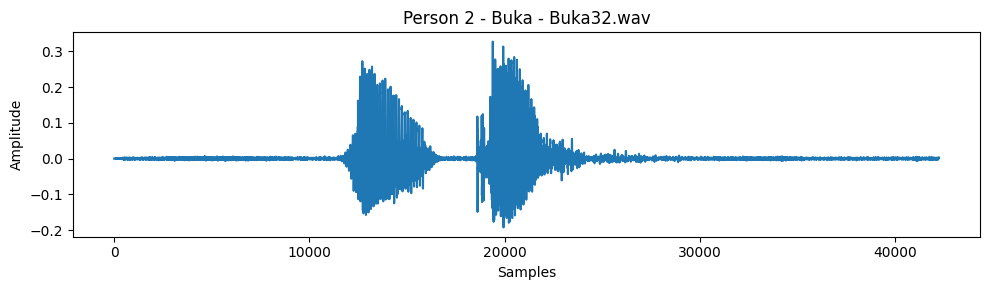

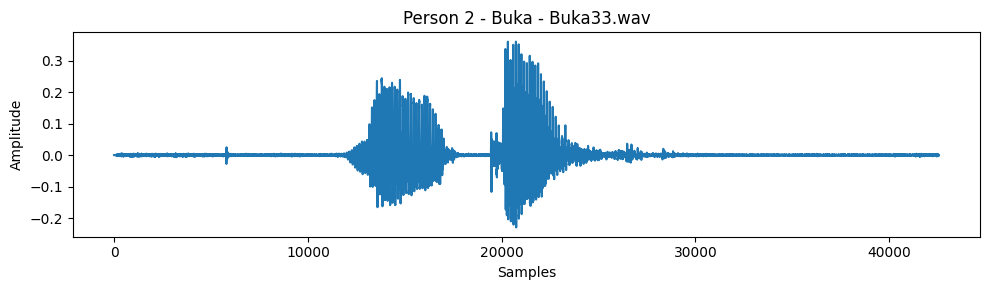

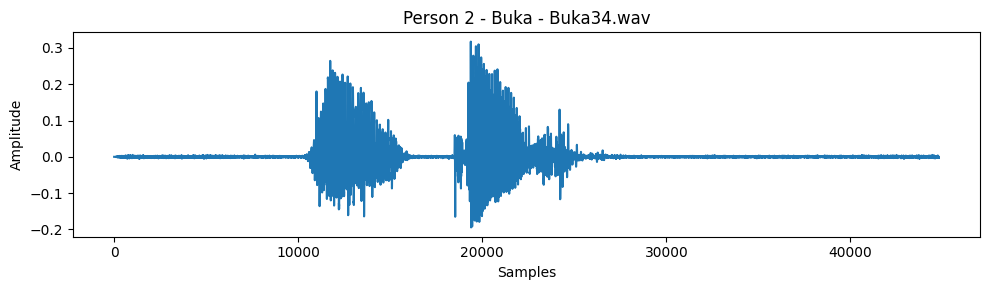

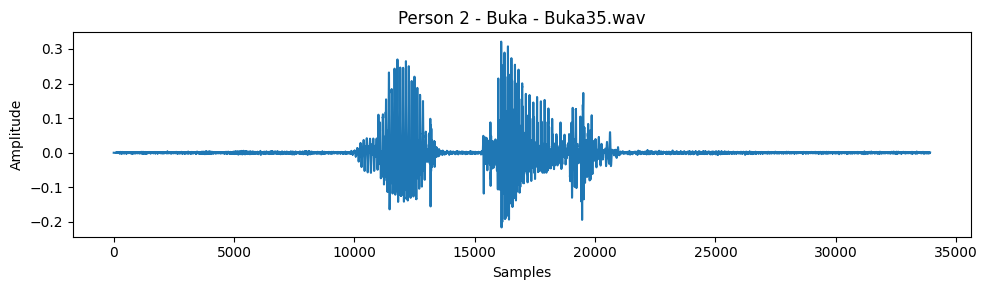

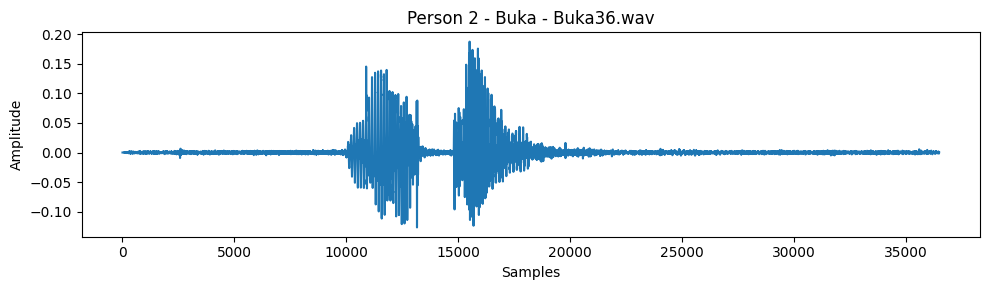

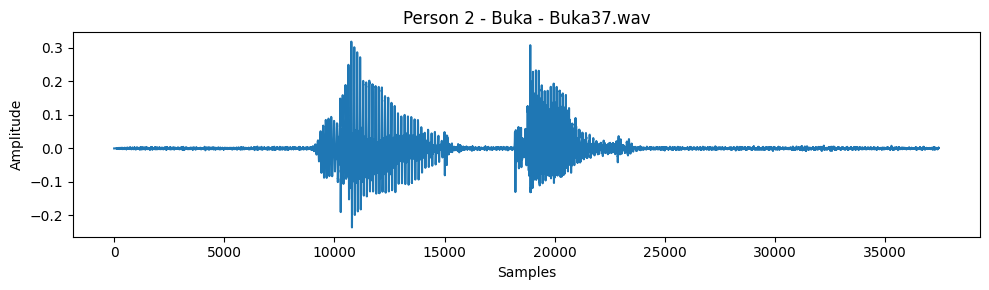

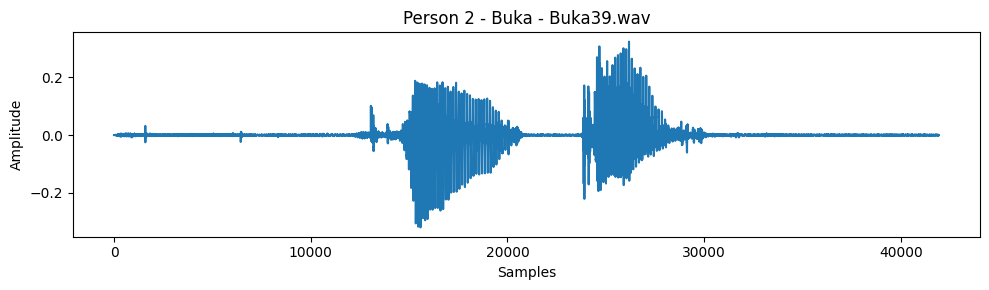

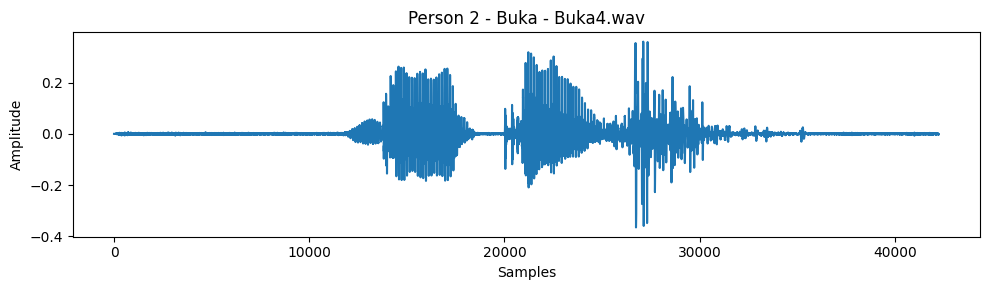

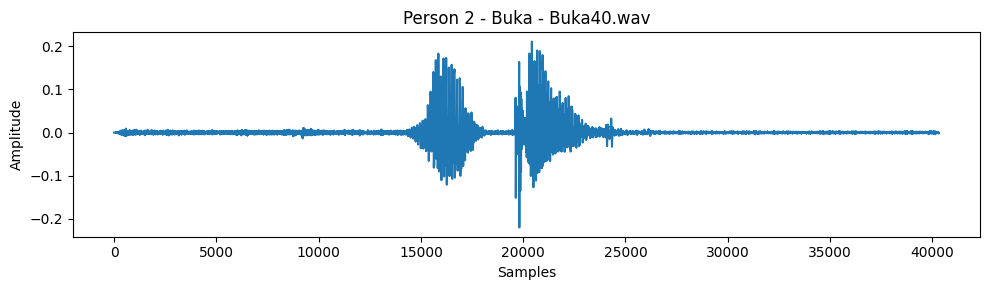

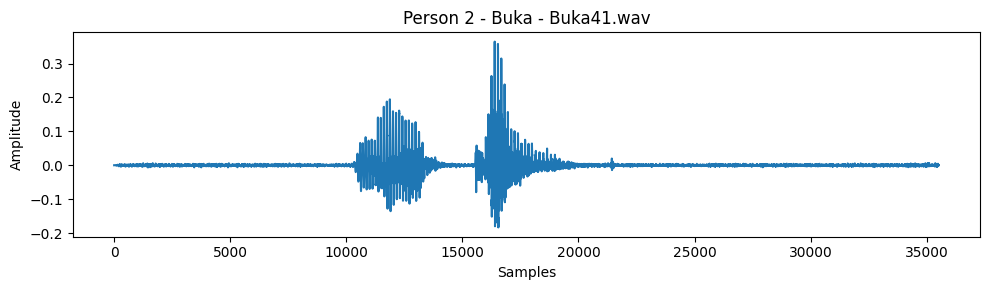

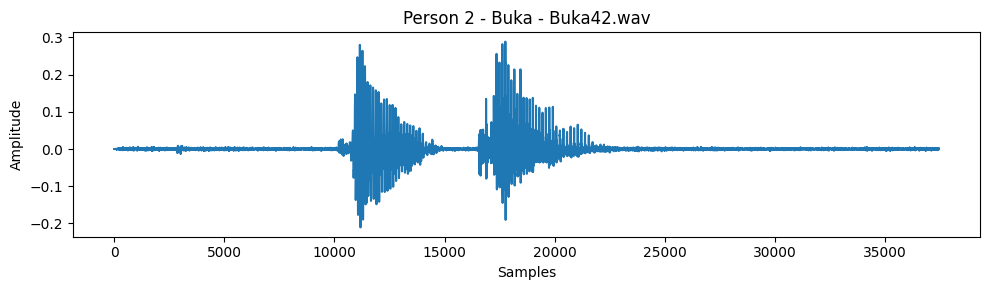

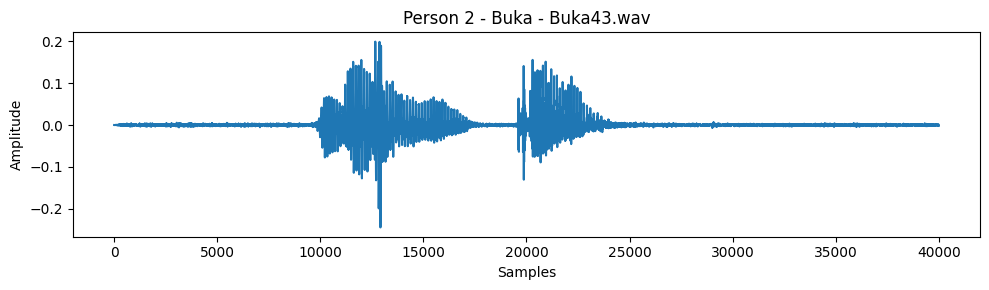

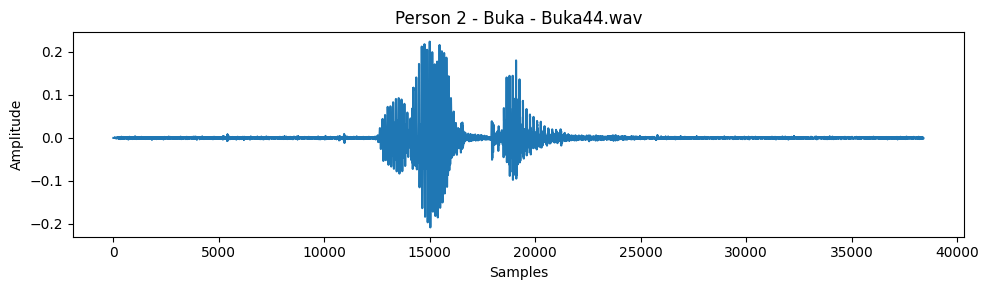

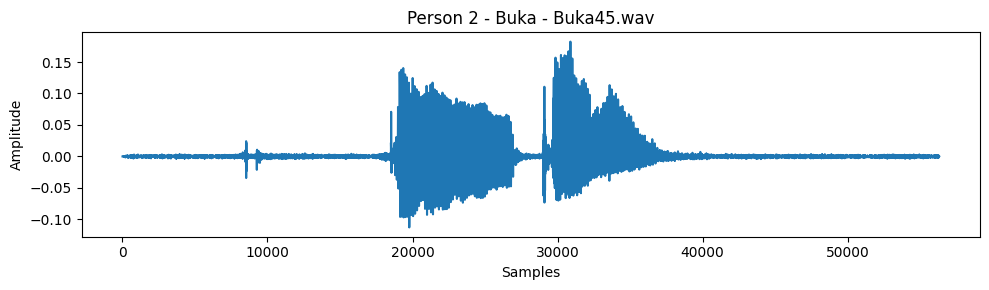

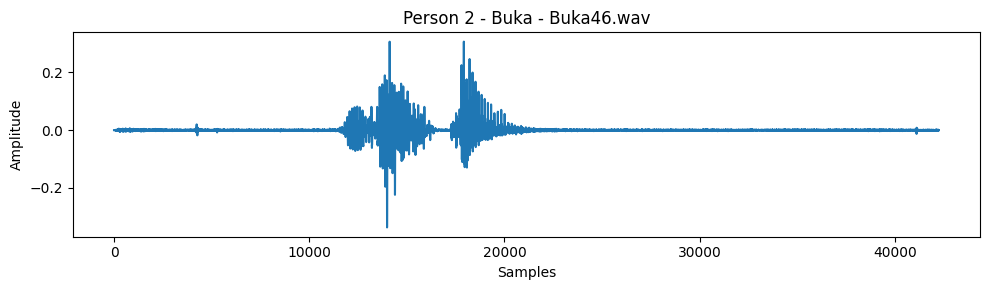

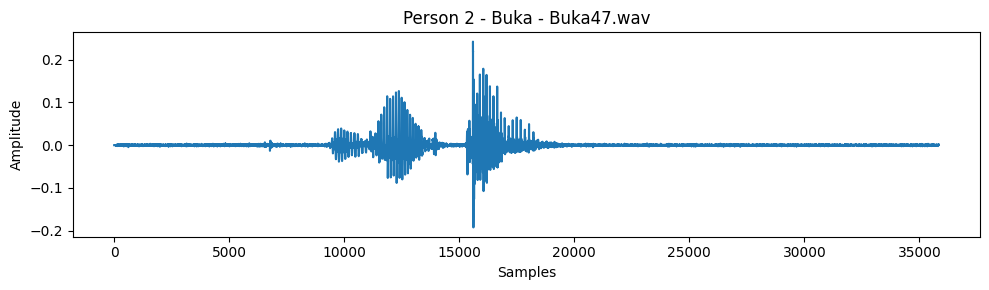

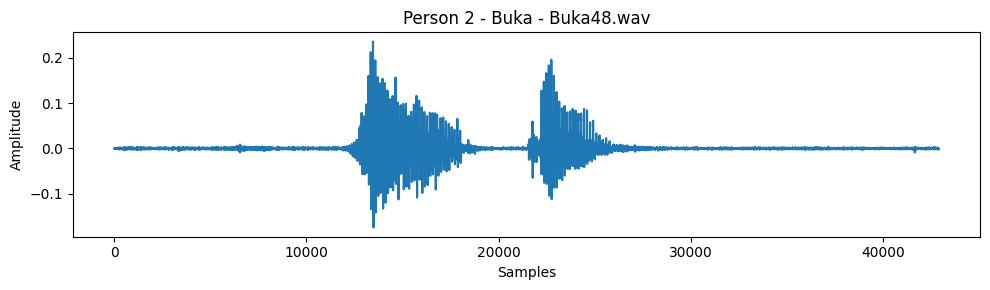

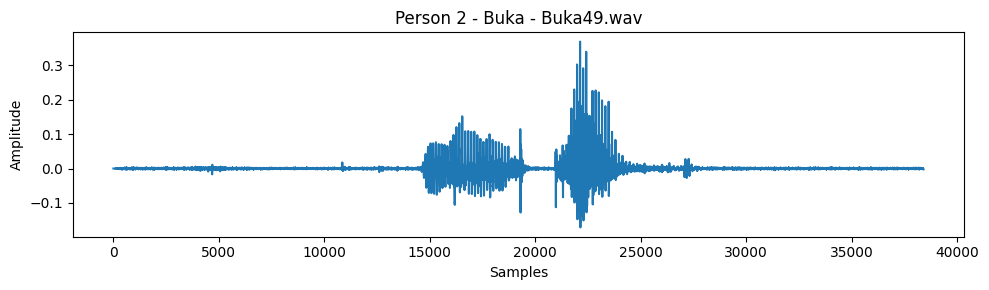

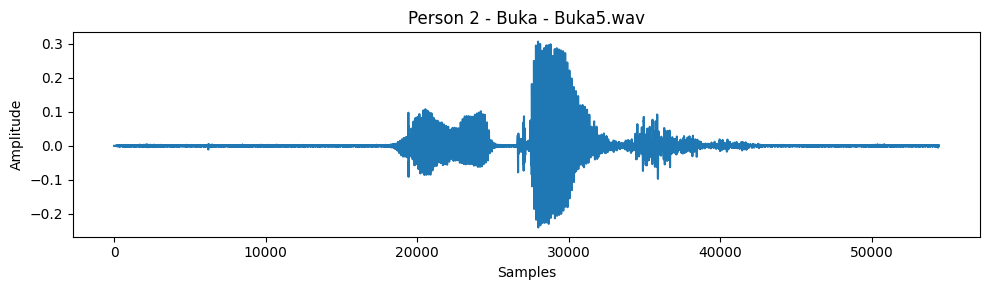

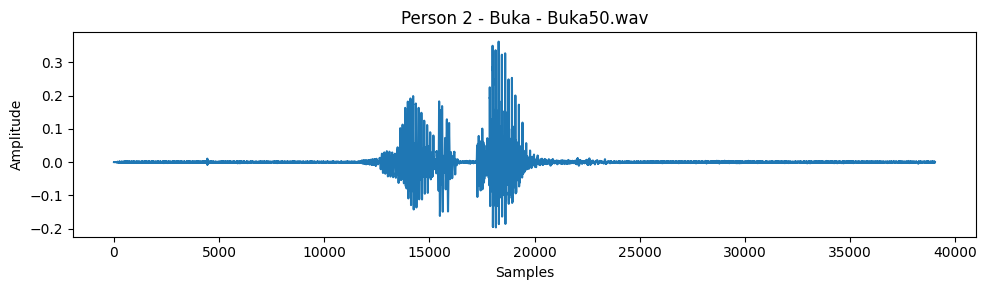

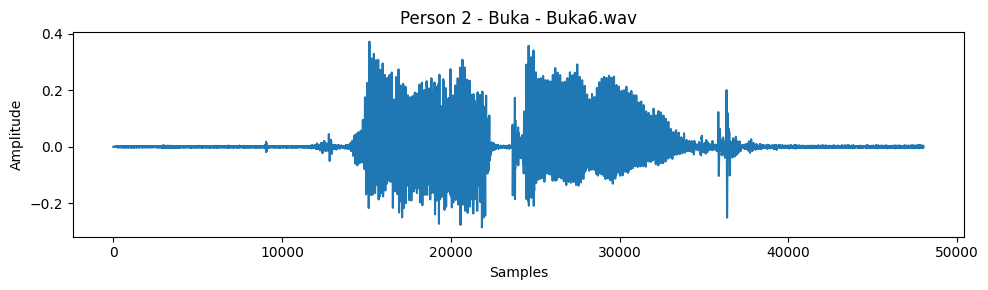

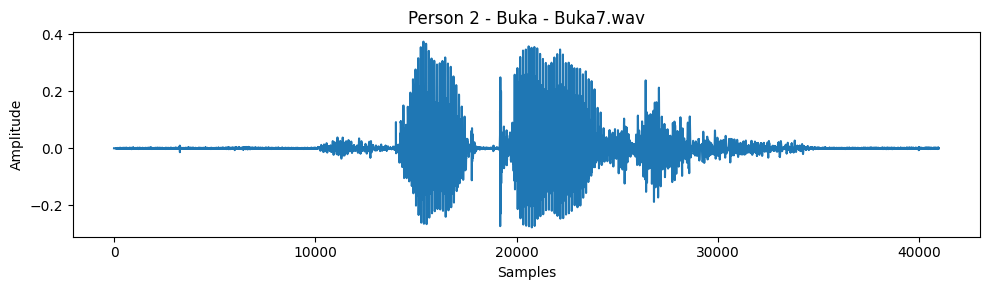

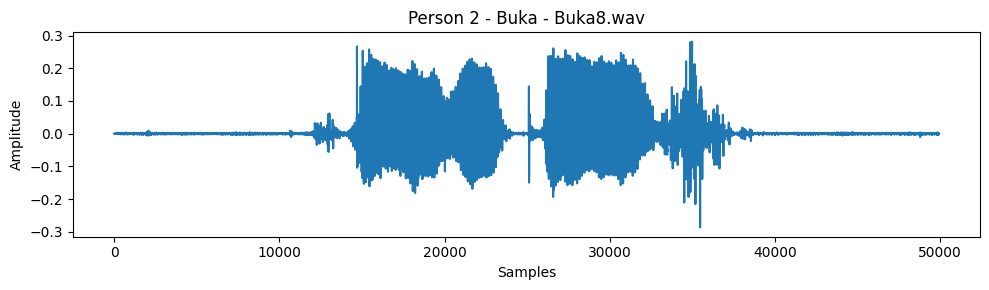

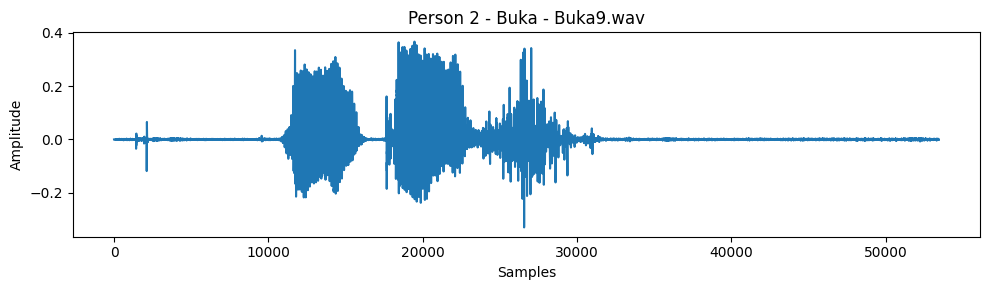

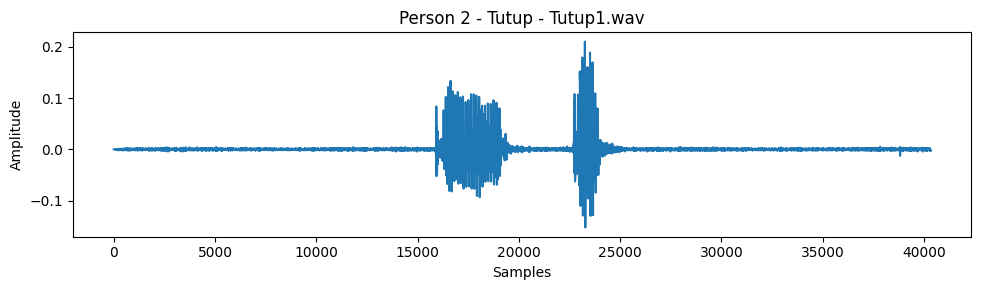

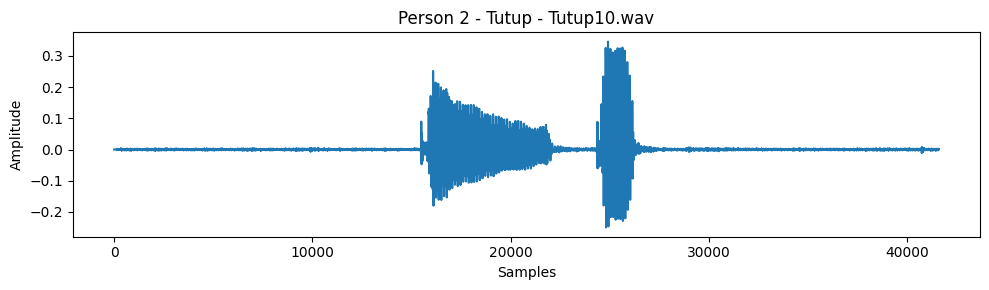

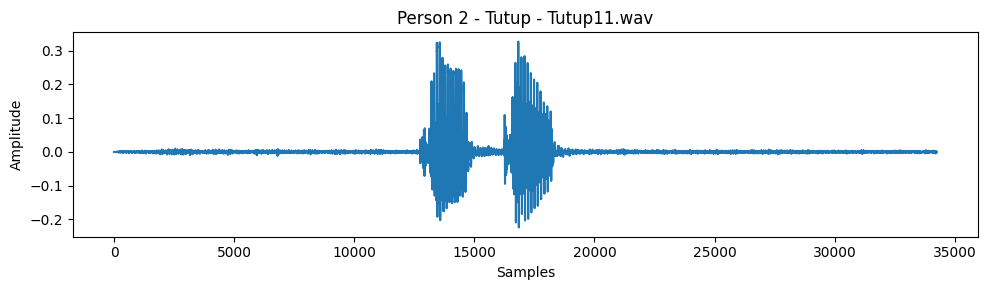

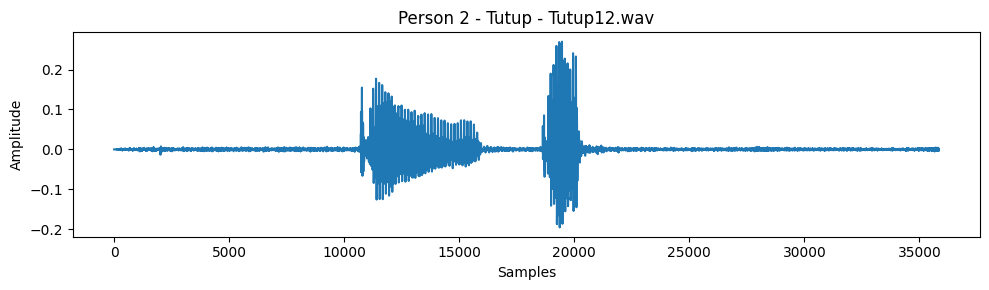

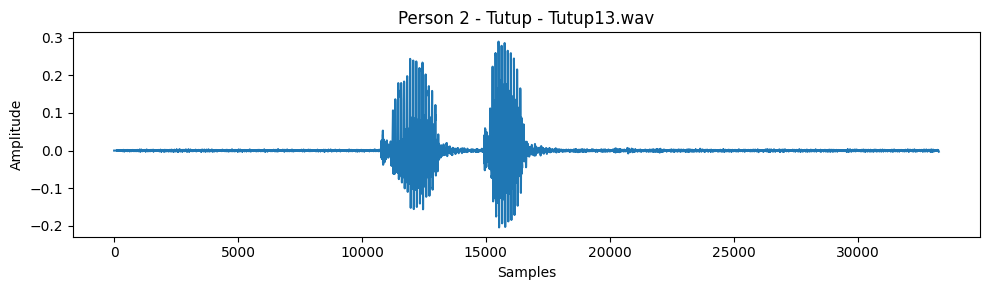

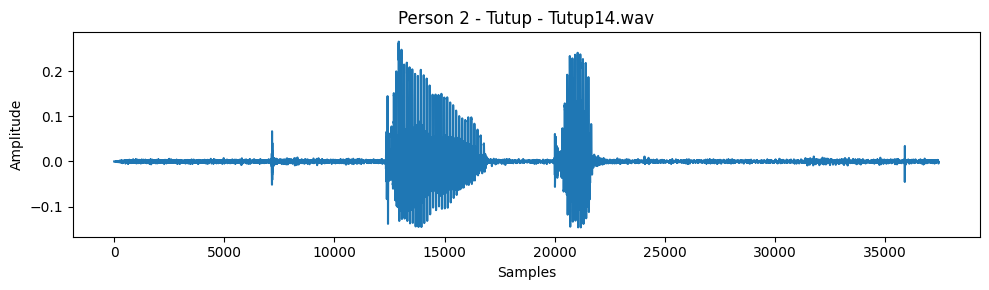

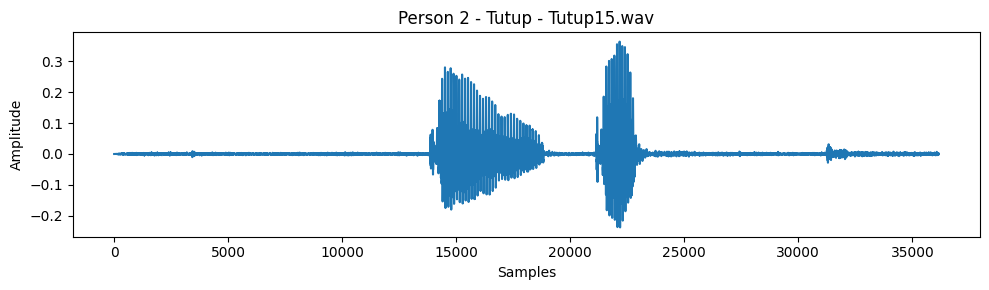

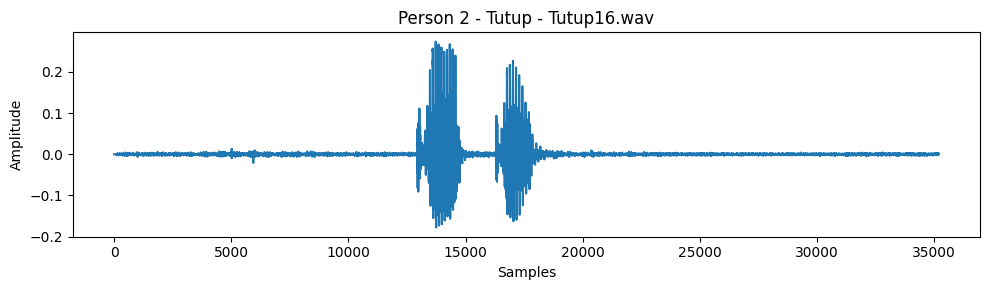

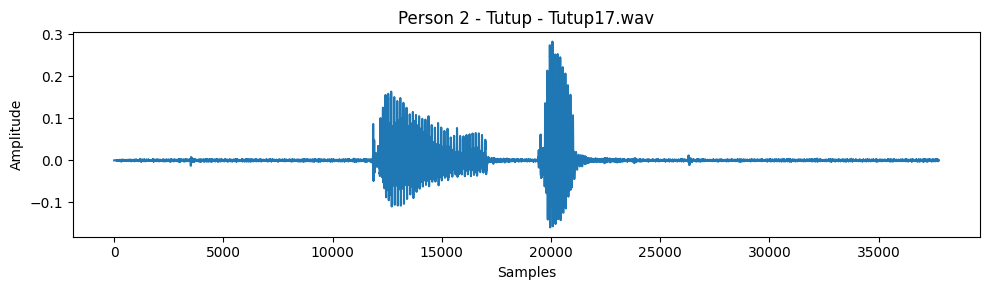

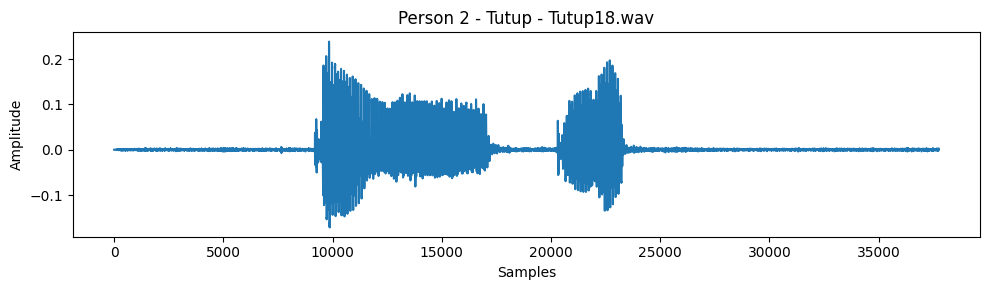

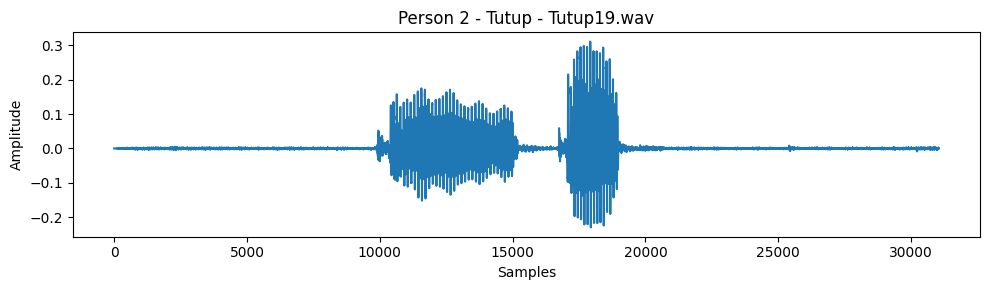

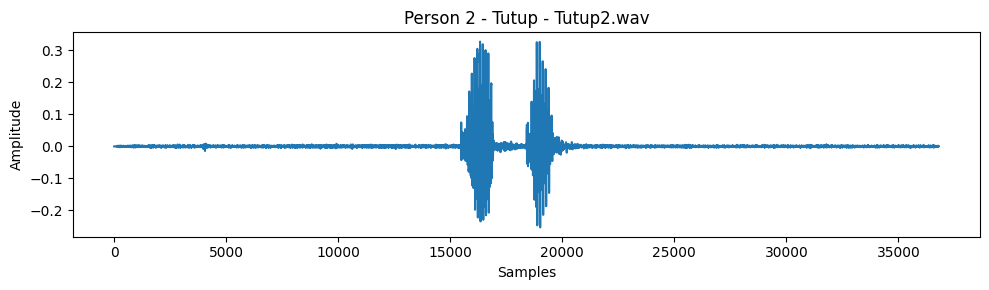

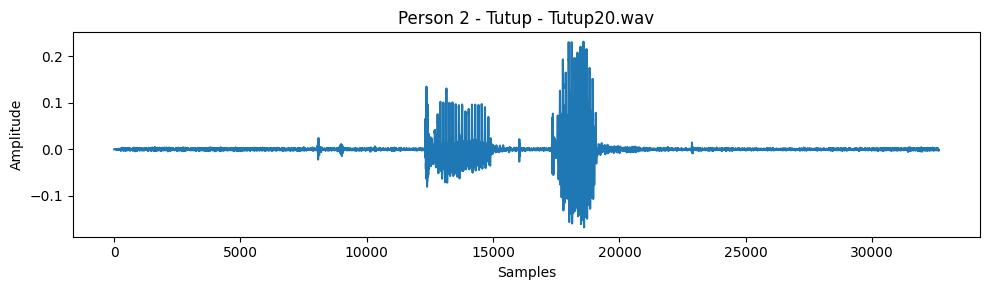

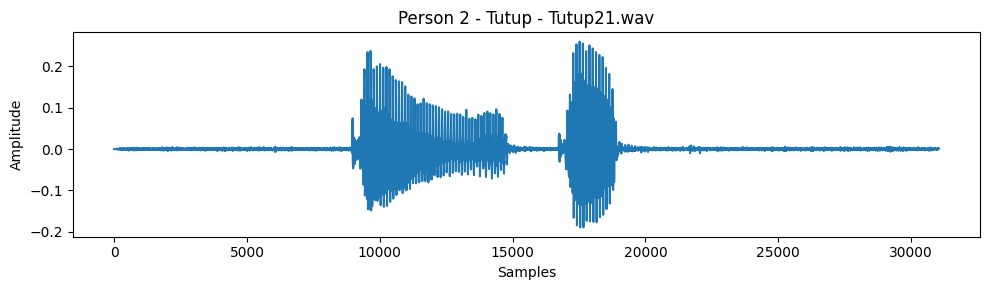

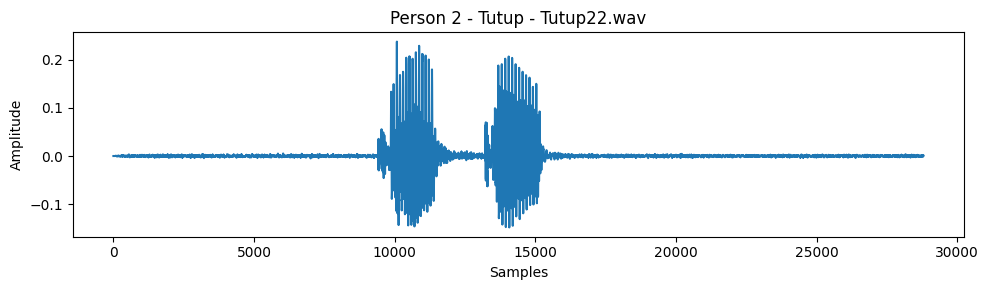

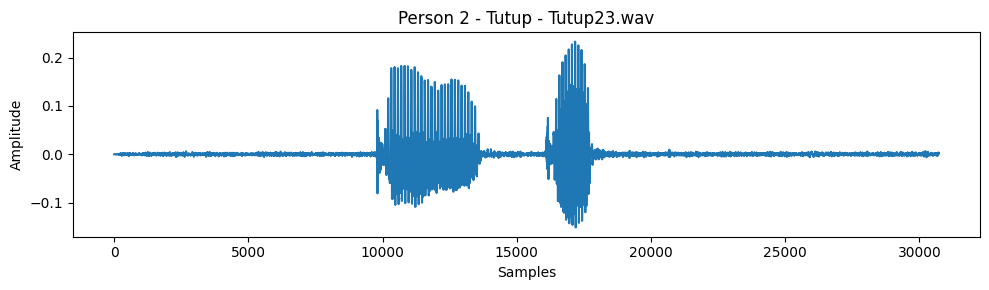

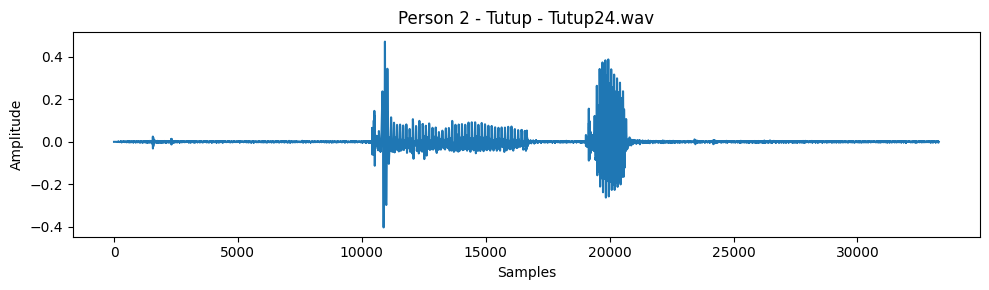

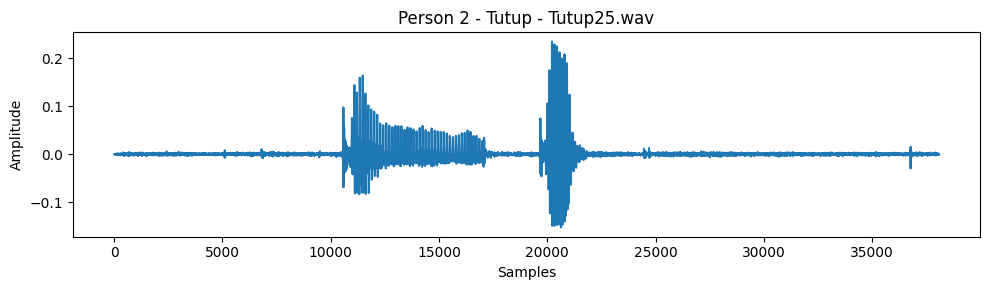

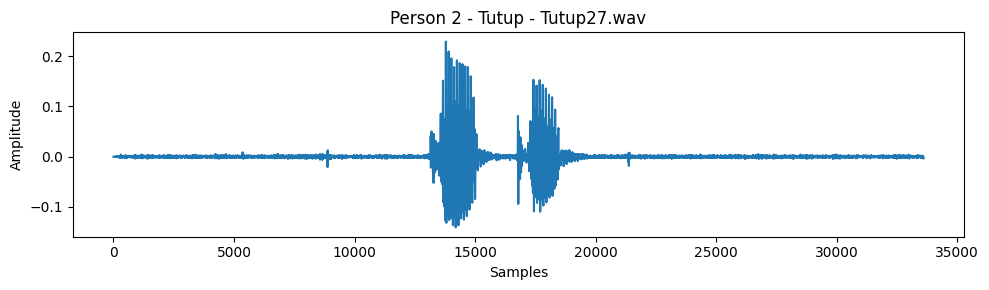

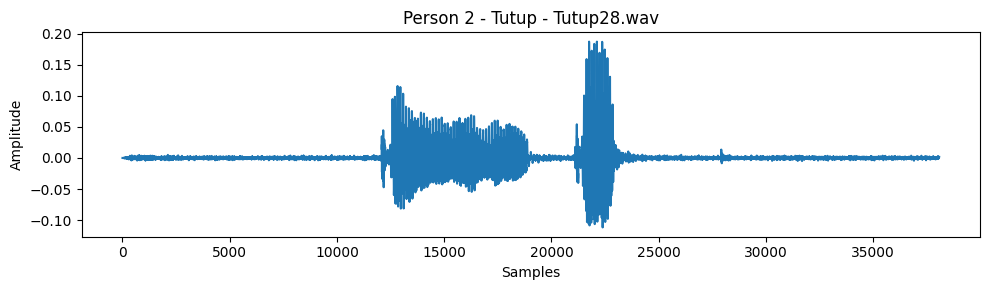

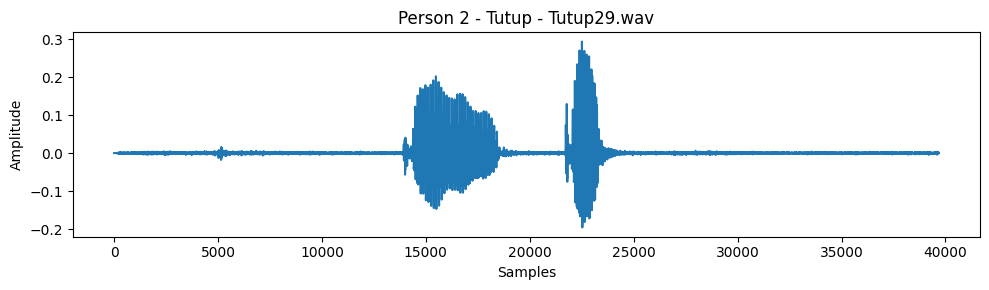

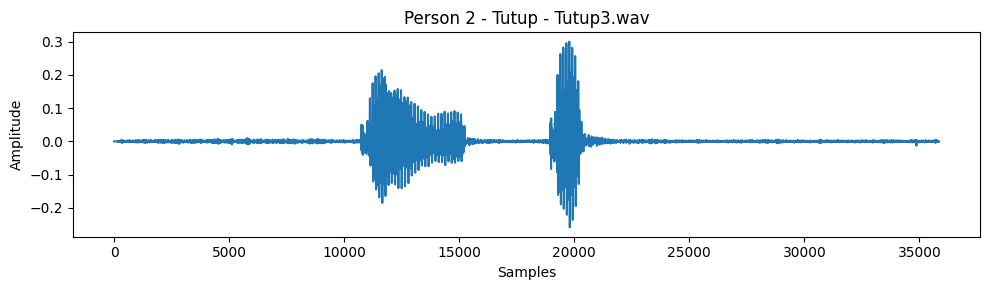

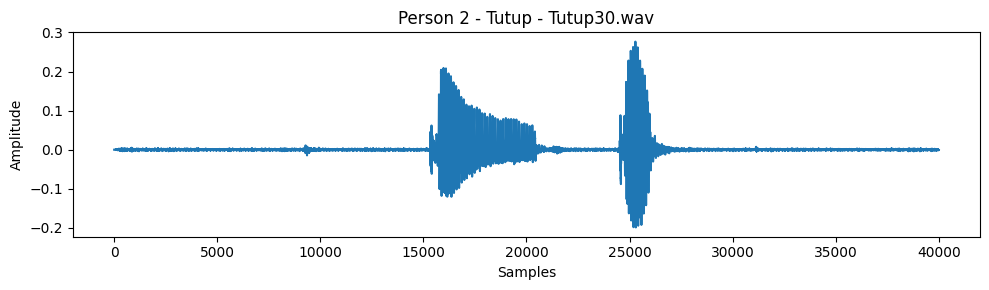

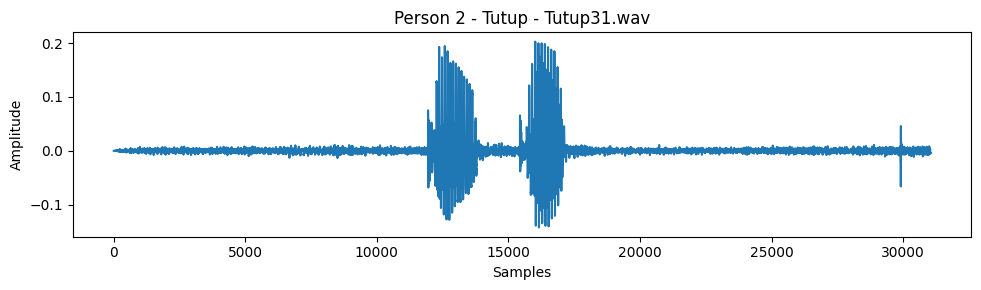

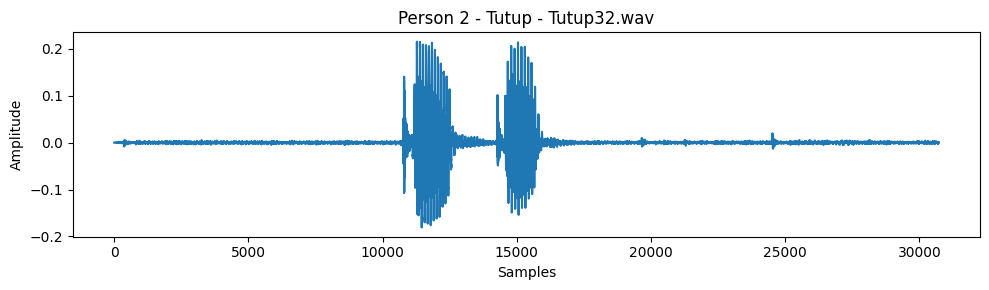

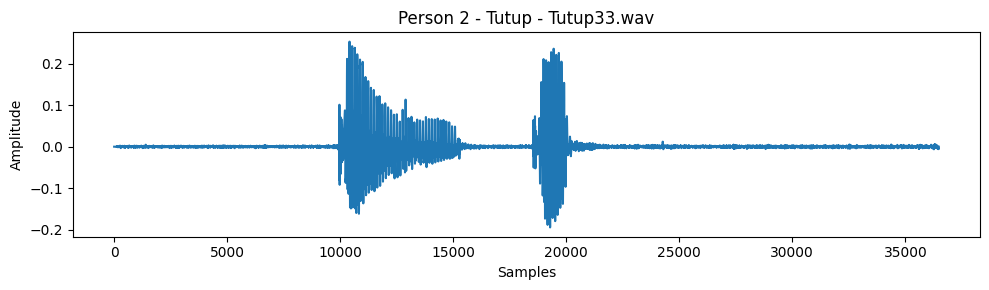

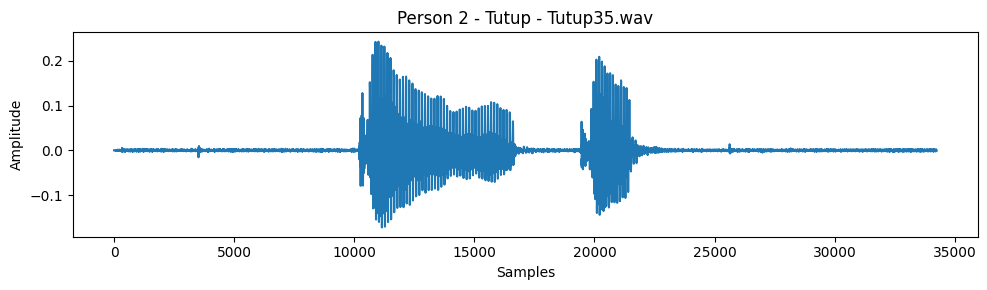

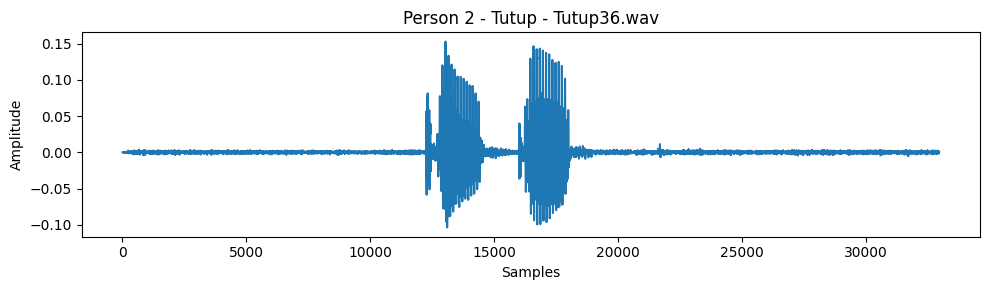

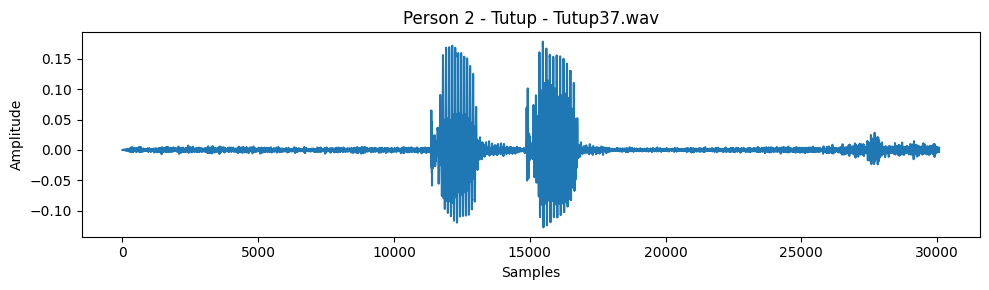

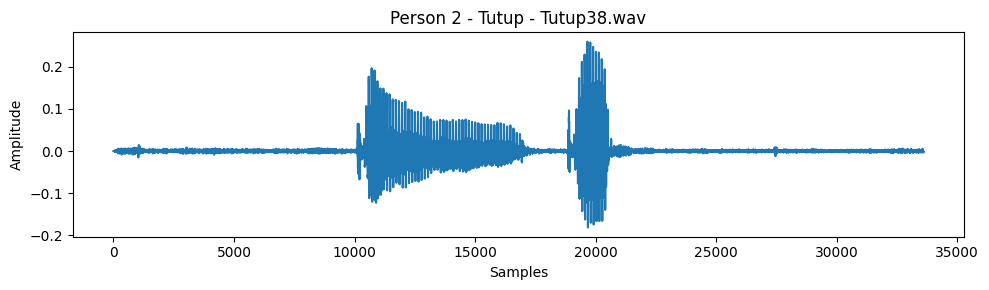

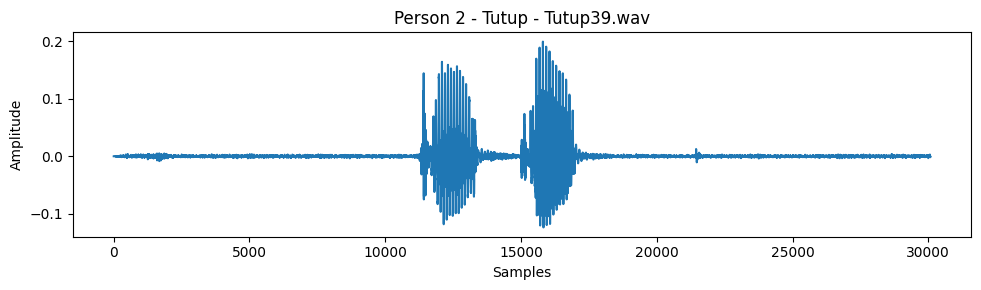

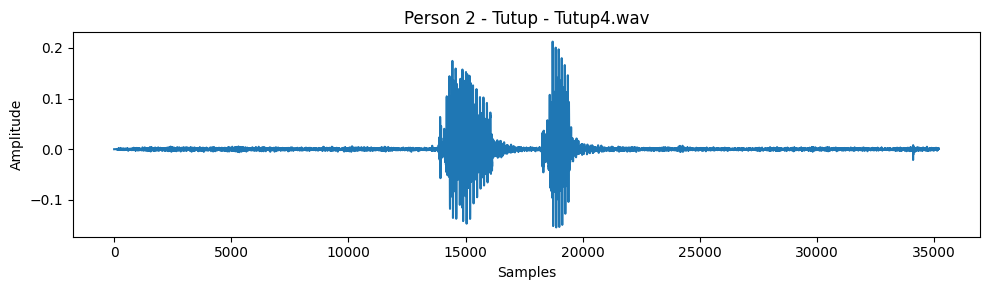

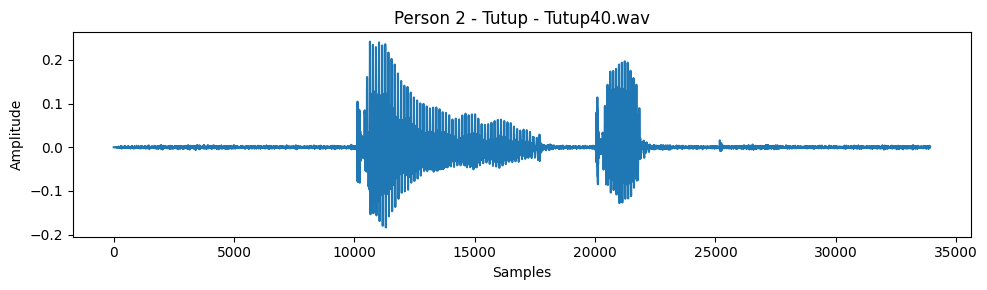

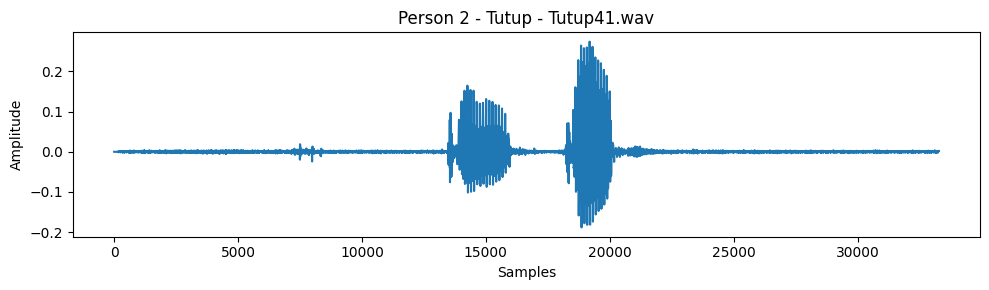

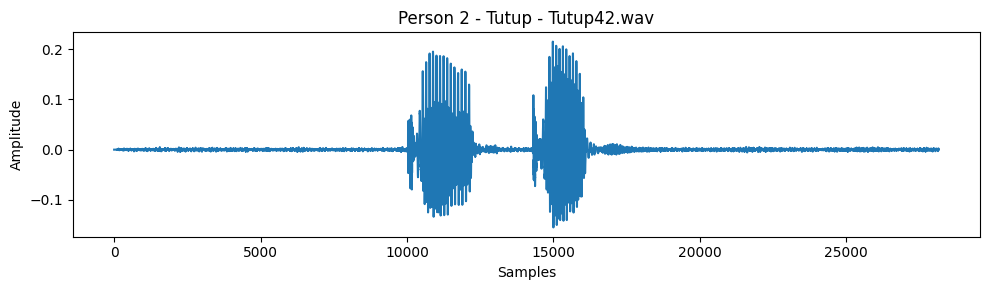

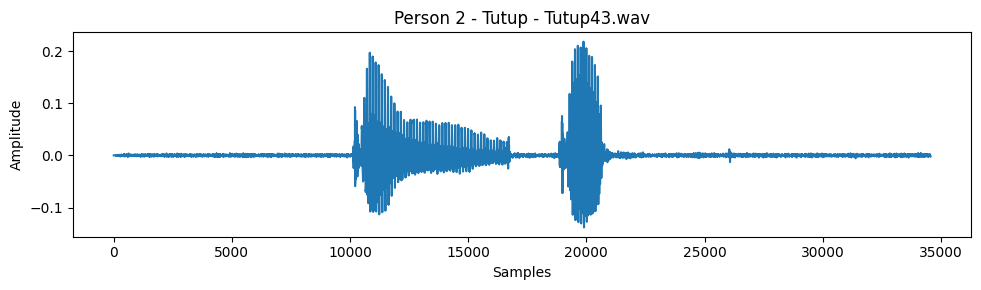

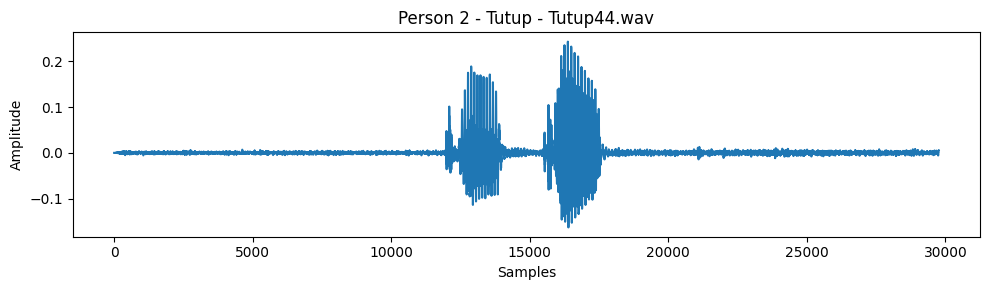

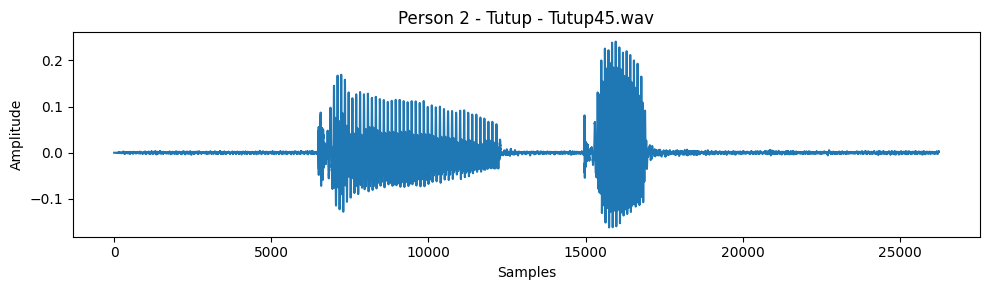

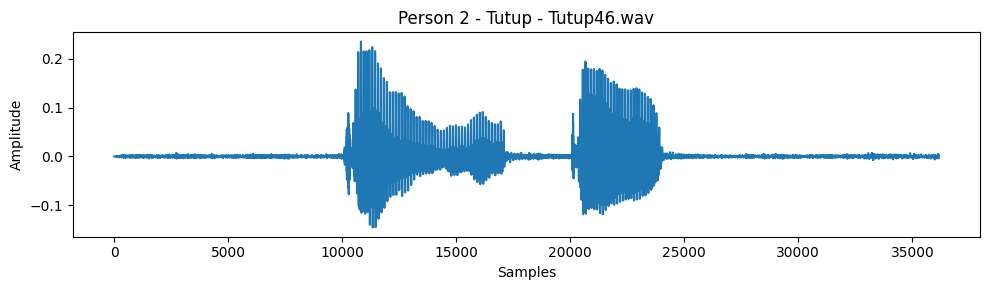

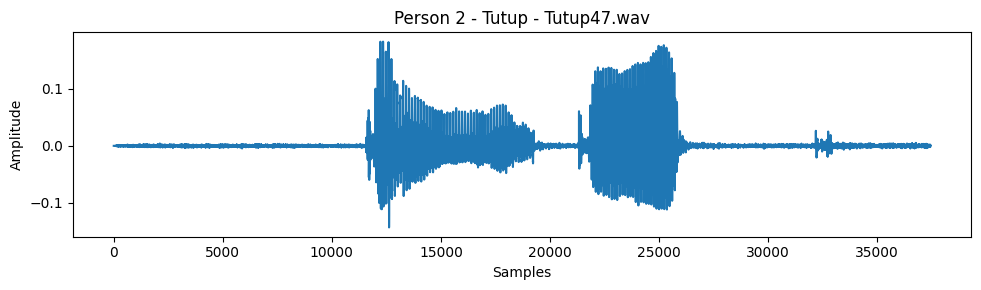

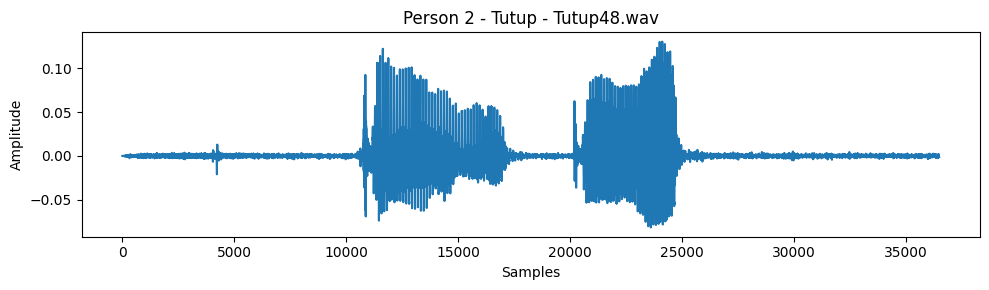

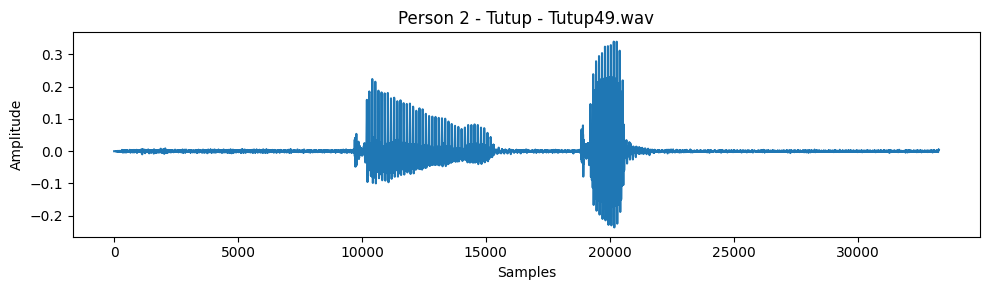

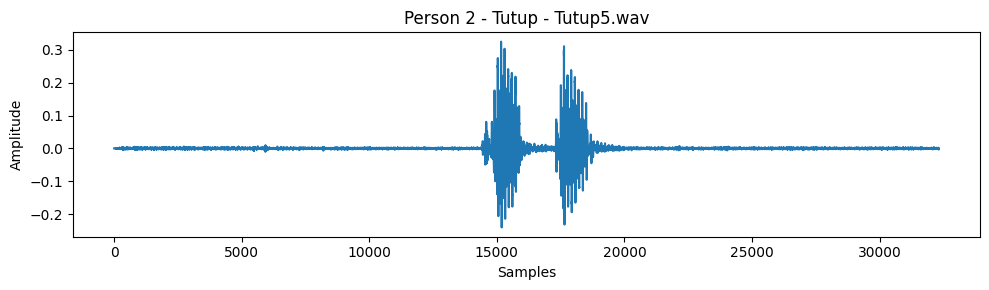

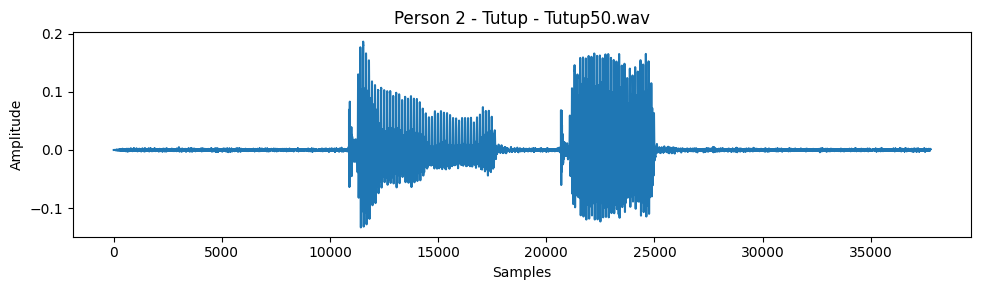

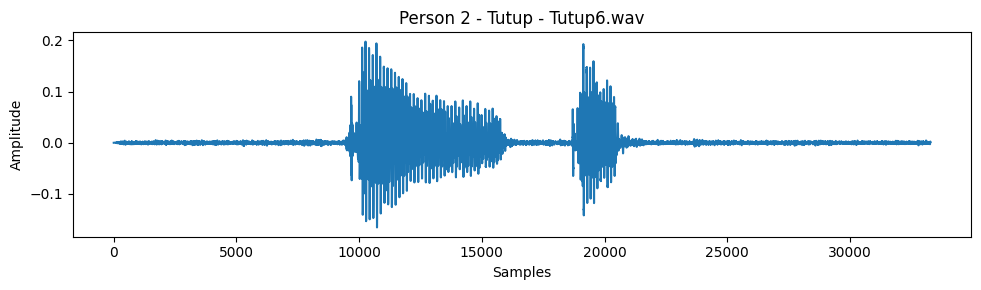

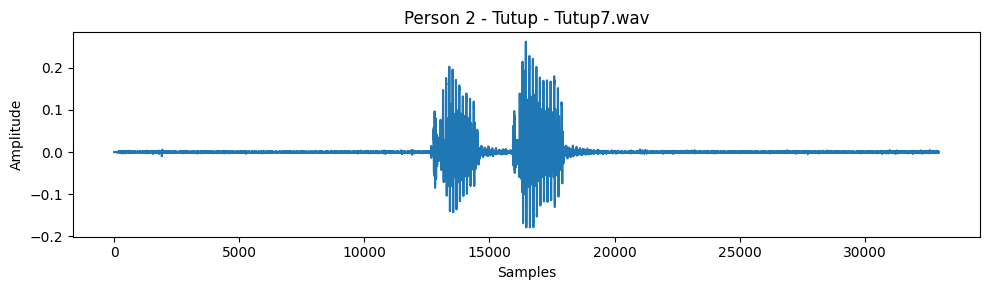

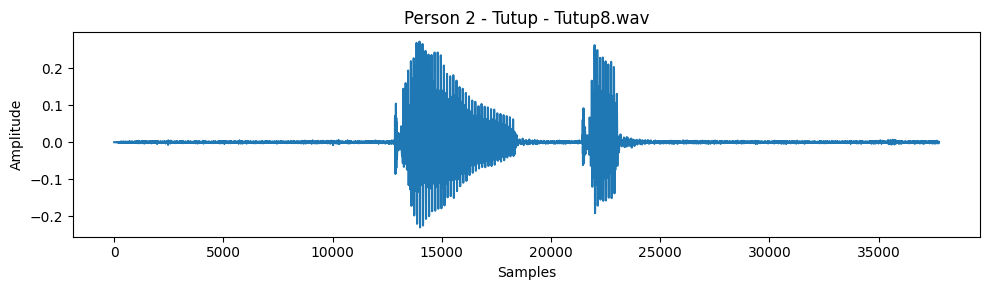

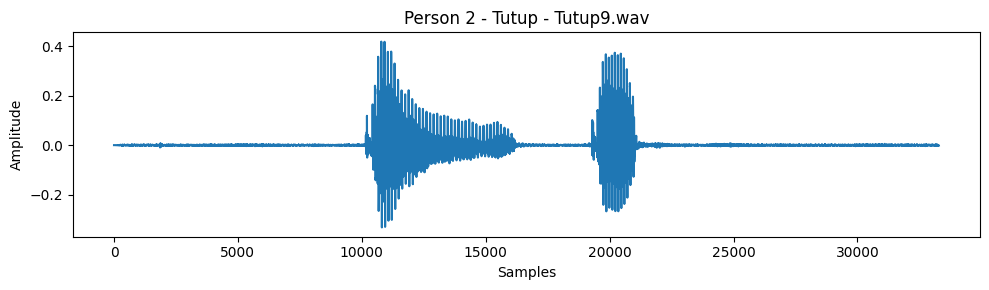

In [4]:
plot_waveforms(person1_audio, "Person 1")
plot_waveforms(person2_audio, "Person 2")

## Ektraksi MFCC 

In [5]:
sr = 16000
n_mfcc = 13

def get_mfcc_matrix(filepath, sr=16000, n_mfcc=13):
    y, _ = librosa.load(filepath, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  
    return mfcc.T     

In [6]:
mfcc_dataset = {
    "buka": [],
    "tutup": []
}

for sub in SUBFOLDERS:
    full = os.path.join(DATASET_PERSON1, sub)
    label = "buka" if "Buka" in sub else "tutup"
    
    for f in os.listdir(full):
        if f.endswith(".wav"):
            path = os.path.join(full, f)
            mfcc_dataset[label].append(get_mfcc_matrix(path))

for sub in SUBFOLDERS_2:
    full = os.path.join(DATASET_PERSON2, sub)
    label = "buka" if "Buka" in sub else "tutup"
    
    for f in os.listdir(full):
        if f.endswith(".wav"):
            path = os.path.join(full, f)
            mfcc_dataset[label].append(get_mfcc_matrix(path))

print("Jumlah Data Buka:", len(mfcc_dataset["buka"]))
print("Jumlah Data Tutup:", len(mfcc_dataset["tutup"]))


Jumlah Data Buka: 99
Jumlah Data Tutup: 98


## Ambil 1 Data baru

In [7]:
new_file = "rekaman_baru.wav"
mfcc_new = get_mfcc_matrix(new_file)

C:\Users\user\AppData\Local\Temp\ipykernel_17732\240347203.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(filepath, sr=sr)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'rekaman_baru.wav'

## Hitung Dynamic Time Wrapping ke Data lama

In [ ]:
def compute_dtw_distance(mfcc1, mfcc2):
    dist, _, _, _ = dtw(mfcc1, mfcc2, dist=lambda x, y: np.linalg.norm(x - y))
    return dist

In [ ]:
dtw_buka = [compute_dtw_distance(mfcc_new, ref) for ref in mfcc_dataset["buka"]]
dtw_tutup = [compute_dtw_distance(mfcc_new, ref) for ref in mfcc_dataset["tutup"]]


## Hitung semua jarak DTW suara baru ke seluruh dataset

In [ ]:
all_mfcc = []
all_labels = []

for label in ["buka", "tutup"]:
    for mf in mfcc_dataset[label]:
        all_mfcc.append(mf)
        all_labels.append(label)

In [ ]:
def compute_all_dtw(mfcc_new, all_mfcc, all_labels):
    distances = []

    for mf, lbl in zip(all_mfcc, all_labels):
        d = compute_dtw_distance(mfcc_new, mf)
        distances.append((d, lbl))
    
    return distances


In [ ]:
def classify_dtw_knn(mfcc_new, all_mfcc, all_labels, k=5):
    distances = compute_all_dtw(mfcc_new, all_mfcc, all_labels)

    distances.sort(key=lambda x: x[0])

    top_k = distances[:k]

    votes = {"buka": 0, "tutup": 0}
    for dist, lbl in top_k:
        votes[lbl] += 1

    print("Top-K distances:")
    for d in top_k:
        print(d)

    if votes["buka"] > votes["tutup"]:
        return "buka"
    else:
        return "tutup"
